<a href="https://colab.research.google.com/github/DavidCastroPena/credit-models/blob/main/FinalProject__XGBoostSurvival_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# First
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

# Second
path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'

try:

    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:

        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

<ipython-input-76-0125d5602935>:28: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)


Successfully read from folder name path


<ipython-input-76-0125d5602935>:29: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


In [ ]:
import pandas as pd

# File paths
path1_10_present = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/10_present.csv'
path1_91_09 = '/content/drive/My Drive/11S7cbE_9RF5lE2TuDVrIgcdrRnwJjwTY/91_09.csv'

path2_10_present = '/content/drive/My Drive/MS&E246/10_present.csv'
path2_91_09 = '/content/drive/My Drive/MS&E246/91_09.csv'


try:
    df_10_present = pd.read_csv(path1_10_present)
    df_91_09 = pd.read_csv(path1_91_09)
    print("Successfully read from folder ID path")
except:
    try:
        df_10_present = pd.read_csv(path2_10_present)
        df_91_09 = pd.read_csv(path2_91_09)
        print("Successfully read from folder name path")
    except Exception as e:
        print(f"Error: {e}")

common_columns = list(set(df_10_present.columns).intersection(set(df_91_09.columns)))
df_10_present = df_10_present[common_columns]
df_91_09 = df_91_09[common_columns]

# Concatenate the datasets (91_09 above, 10_present below)
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)

# Output the shape and preview of the combined dataframe
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")


<ipython-input-77-b84f50aac373>:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10_present = pd.read_csv(path2_10_present)
<ipython-input-77-b84f50aac373>:18: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_91_09 = pd.read_csv(path2_91_09)


Successfully read from folder name path
Combined dataset shape: (218095, 38)
  FirstDisbursementDate ProjectState        BorrCity  TermInMonths  \
0            11/13/1991           CA       SAN DIEGO           240   
1            10/16/1991           UT  SALT LAKE CITY           240   
2            11/13/1991           WY         JACKSON           240   
3             7/15/1992           IN    MOUNT VERNON           120   
4             2/13/1991           IN         ELKHART           240   

  ThirdPartyLender_City ThirdPartyLender_Name  GrossApproval  NaicsCode  \
0                   NaN                   NaN       175000.0        0.0   
1                   NaN                   NaN       231000.0        0.0   
2                   NaN                   NaN       370000.0   448140.0   
3                   NaN                   NaN       561000.0        0.0   
4                   NaN                   NaN       310000.0        0.0   

         CDC_City ApprovalDate  ...        NaicsDes

Concatenating two files

In [ ]:
#Concat both 504 datsets
df_combined = pd.concat([df_91_09, df_10_present], ignore_index=True)
print(f"Combined dataset shape: {df_combined.shape}")
print(df_combined.head())

# Save the combined dataset to a new file if needed
output_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df_combined.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")

Combined dataset shape: (218095, 38)
  FirstDisbursementDate ProjectState        BorrCity  TermInMonths  \
0            11/13/1991           CA       SAN DIEGO           240   
1            10/16/1991           UT  SALT LAKE CITY           240   
2            11/13/1991           WY         JACKSON           240   
3             7/15/1992           IN    MOUNT VERNON           120   
4             2/13/1991           IN         ELKHART           240   

  ThirdPartyLender_City ThirdPartyLender_Name  GrossApproval  NaicsCode  \
0                   NaN                   NaN       175000.0        0.0   
1                   NaN                   NaN       231000.0        0.0   
2                   NaN                   NaN       370000.0   448140.0   
3                   NaN                   NaN       561000.0        0.0   
4                   NaN                   NaN       310000.0        0.0   

         CDC_City ApprovalDate  ...        NaicsDescription  \
0       San Diego    8/26/19

30,641 CANCLD loans. Q1: IF loanstatus=chgoff & grosschargeoff different from 0; should be removed? Q2: missing values was created based on whether loanstatus is empty. is this right?

In [ ]:

# Load
combined_path = '/content/drive/My Drive/MS&E246/combined_dataset.csv'
df = pd.read_csv(combined_path)

# copy of the dataset
df_cleaned = df.copy()
print(f"Initial dataset shape: {df_cleaned.shape}")

# =Remove loans labeled "Canceled"
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['LoanStatus'] != 'CANCLD']
    print(f"After removing 'Canceled' loans: {df_cleaned.shape}")
else:
    print("'LoanStatus' column not found. Skipping 'Canceled' filtering.")

#  Handle blank or missing LoanStatus
# Create a binary variable `missingStatus`
if 'LoanStatus' in df_cleaned.columns:
    df_cleaned['missingStatus'] = df_cleaned['LoanStatus'].isnull() | (df_cleaned['LoanStatus'].str.strip() == "")
    df_cleaned['missingStatus'] = df_cleaned['missingStatus'].astype(int)
    print(f"After creating 'missingStatus': {df_cleaned.shape}")
    print(f"Number of rows with missing statuses: {df_cleaned['missingStatus'].sum()}")
else:
    print("'LoanStatus' column not found. Skipping 'missingStatus' creation.")

# Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset saved to: {updated_path}")



<ipython-input-79-6a3024ae9c8b>:3: DtypeWarning: Columns (4,5,17,27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_path)


Initial dataset shape: (218095, 38)
After removing 'Canceled' loans: (187454, 38)
After creating 'missingStatus': (187454, 39)
Number of rows with missing statuses: 350
Updated dataset saved to: /content/drive/My Drive/MS&E246/cleaned_with_missing_status.csv


In [ ]:
#Normalization

# Define continuous variables for normalization
continuous_vars = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported', 'UnemploymentRate']


# Check if all continuous variables exist in the dataset before applying normalization
existing_continuous_vars = [col for col in continuous_vars if col in df_cleaned.columns]

# Apply normalization only to existing columns
if existing_continuous_vars:
    scaler = MinMaxScaler()
    df_cleaned[existing_continuous_vars] = scaler.fit_transform(df_cleaned[existing_continuous_vars])
    print("Normalization applied successfully.")
else:
    print("No continuous variables found for normalization.")

# Add the "Default" variable for classification (keeps next block unchanged)
df_cleaned['Default'] = df_cleaned['LoanStatus'].apply(lambda x: 1 if x == 'CHGOFF' else 0)

# Check distribution of "Default"
default_distribution = df_cleaned['Default'].value_counts()
print(f"Default distribution:\n{default_distribution}")

# Save the dataset **without breaking the next block**
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset with normalization and 'Default' variable saved to: {updated_path}")



Normalization applied successfully.
Default distribution:
Default
0    175376
1     12078
Name: count, dtype: int64
Updated dataset with normalization and 'Default' variable saved to: /content/drive/My Drive/MS&E246/cleaned_with_defaults.csv


In [ ]:
#Model Splitting should be done by calendar dates
'''
Proposed Splitting Strategy
To create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:

Training Set (Pre-Crisis Stability and Dot-Com Era):
Timeframe: 1990–2006.
Rationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.

Validation Set (2007–2015, Financial Crisis and Recovery):
Timeframe: 2007–2015.
Rationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.

Testing Set (COVID-19 Pandemic and Current Data):
Timeframe: 2016–2024.
Rationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.
'''



"\nProposed Splitting Strategy\nTo create training, validation, and testing sets that align with these economic shifts, split the data based on these crises:\n\nTraining Set (Pre-Crisis Stability and Dot-Com Era):\nTimeframe: 1990–2006.\nRationale: This period includes relatively stable economic years, the Dot-Com bubble, and its aftermath. Training the model on this data helps it learn patterns from normal and mildly volatile periods.\n\nValidation Set (2007–2015, Financial Crisis and Recovery):\nTimeframe: 2007–2015.\nRationale: Includes the 2007–2008 financial crisis, the subsequent Great Recession, and the recovery phase. This period helps validate how well the model generalizes to high-stress financial environments.\n\nTesting Set (COVID-19 Pandemic and Current Data):\nTimeframe: 2016–2024.\nRationale: Includes recent years leading up to and during the COVID-19 pandemic, as well as the post-pandemic recovery. This evaluates the model's robustness on recent economic disruptions.\n"

In [ ]:
# Feature selection: two strategies--using Cai's Chi2 test and via logistic regression using literature suggested variables

'''
PIF: Paid In Full.
CANCLD: Canceled.
CHGOFF: Charged Off (Default).
nan: Missing/Not Available.
EXEMPT: Exempt (special status, possibly regulatory or administrative).
If you are focusing on predicting defaults, you would typically:

Treat CHGOFF as a default (1).
Treat PIF and potentially EXEMPT as non-defaults (0).
Exclude or handle CANCLD and missing values (nan) separately, depending on their role in your analysis.
'''

# Add the binary "Default" variable
# 1 for "CHGOFF" (default), 0 for "PIF" or "EXEMPT"
df_cleaned['Default'] = df_cleaned['LoanStatus'].apply(lambda x: 1 if x == 'CHGOFF' else 0)

# Check the distribution of the new "Default" variable
default_distribution = df_cleaned['Default'].value_counts()
print(f"Default distribution:\n{default_distribution}")

# Save the updated dataset
updated_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df_cleaned.to_csv(updated_path, index=False)
print(f"Updated dataset with 'Default' variable saved to: {updated_path}")




Default distribution:
Default
0    175376
1     12078
Name: count, dtype: int64
Updated dataset with 'Default' variable saved to: /content/drive/My Drive/MS&E246/cleaned_with_defaults.csv


In [ ]:
#Feature analysis: logit(P (Default=1))= b0+b1GrossAproval+B2*TermInMonths+B3*NaicsCode=B4ApprovalFiscalYear+B5JobsSupported+B6NaicsDescription

#B6 is high dimensional. so lets prompt gemini to reduce the dimensionality of B6

# Load the dataset
data_path = '/content/drive/My Drive/MS&E246/cleaned_with_defaults.csv'
df = pd.read_csv(data_path, low_memory=False)

# NAICS code mappings to Sectors
naics_mapping = {
    '11': 'Agriculture',       # Agriculture, Forestry, Fishing, and Hunting
    '21': 'Mining',            # Mining, Quarrying, and Oil and Gas Extraction
    '22': 'Utilities',         # Utilities
    '23': 'Construction',      # Construction
    '31': 'Manufacturing',     # Manufacturing
    '32': 'Manufacturing',     # Manufacturing
    '33': 'Manufacturing',     # Manufacturing
    '42': 'Wholesale Trade',   # Wholesale Trade
    '44': 'Retail Trade',      # Retail Trade
    '45': 'Retail Trade',      # Retail Trade
    '48': 'Transportation',    # Transportation and Warehousing
    '49': 'Transportation',    # Transportation and Warehousing
    '51': 'Information',       # Information
    '52': 'Finance',           # Finance and Insurance
    '53': 'Real Estate',       # Real Estate and Rental and Leasing
    '54': 'Services',          # Professional, Scientific, and Technical Services
    '55': 'Management',        # Management of Companies and Enterprises
    '56': 'Administrative',    # Administrative and Support and Waste Management
    '61': 'Services',          # Educational Services
    '62': 'Services',          # Health Care and Social Assistance
    '71': 'Entertainment',     # Arts, Entertainment, and Recreation
    '72': 'Hospitality',       # Accommodation and Food Services
    '81': 'Other',             # Other Services (except Public Administration)
    '92': 'Public',            # Public Administration
}

# Helper function to map NAICS codes to Sectors
def map_naics_code(code):
    try:
        if pd.notnull(code) and float(code) != 0.0:  # Exclude invalid codes
            code = str(int(float(code)))  # Convert to string
            naics_prefix = code[:2]  # Get the first 2 digits
            return naics_mapping.get(naics_prefix, "Other")  # Map to category
        return "Other"  # Default for missing or invalid codes
    except ValueError:
        return "Other"  # Handle unexpected non-numeric values

# Map NaicsCode to Sectors
df['Sector'] = df['NaicsCode'].apply(map_naics_code)

# Display unique values in the Sector column
if 'Sector' in df.columns:
    unique_sectors = df['Sector'].unique()
    print("Unique values in 'Sector' column:")
    print(unique_sectors)
    print(f"Total unique values: {len(unique_sectors)}")
else:
    print("The 'Sector' column is not present in the dataset.")

# One-hot encode the Sector column
df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=False)

# Correct the one-hot encoded columns by replacing True/False with 1/0
sector_columns = [col for col in df_encoded.columns if col.startswith('Sector_')]
df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})

# Save the updated dataset with corrected sector columns
output_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df_encoded.to_csv(output_path, index=False)

# Print confirmation and dataset details
print(f"\nUpdated dataset with corrected sector columns saved to: {output_path}")
print(f"Shape of the dataset after encoding: {df_encoded.shape}")
print("\nColumns in the dataset after encoding:")
print(df_encoded.columns.tolist())

# Verify the encoding
print("\nSector column verification:")
for col in sector_columns:
    print(f"{col}: Unique values -> {df_encoded[col].unique()}")


Unique values in 'Sector' column:
['Other' 'Retail Trade' 'Wholesale Trade' 'Manufacturing' 'Administrative'
 'Agriculture' 'Construction' 'Services' 'Transportation' 'Information'
 'Mining' 'Entertainment' 'Real Estate' 'Hospitality' 'Public' 'Utilities'
 'Management' 'Finance']
Total unique values: 18


<ipython-input-83-06a588991ff5>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})



Updated dataset with corrected sector columns saved to: /content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv
Shape of the dataset after encoding: (187454, 58)

Columns in the dataset after encoding:
['FirstDisbursementDate', 'ProjectState', 'BorrCity', 'TermInMonths', 'ThirdPartyLender_City', 'ThirdPartyLender_Name', 'GrossApproval', 'NaicsCode', 'CDC_City', 'ApprovalDate', 'Program', 'DeliveryMethod', 'CongressionalDistrict', 'ThirdPartyDollars', 'GrossChargeOffAmount', 'CDC_Street', 'BorrZip', 'ThirdPartyLender_State', 'PaidInFullDate', 'BusinessType', 'BorrStreet', 'CDC_State', 'FranchiseName', 'CDC_Name', 'Subprogram', 'SBADistrictOffice', 'BorrName', 'BusinessAge', 'NaicsDescription', 'ApprovalFiscalYear', 'BorrState', 'ProjectCounty', 'CDC_Zip', 'ChargeOffDate', 'AsOfDate', 'FranchiseCode', 'LoanStatus', 'JobsSupported', 'missingStatus', 'Default', 'Sector_Administrative', 'Sector_Agriculture', 'Sector_Construction', 'Sector_Entertainment', 'Sector_Finance',

In [ ]:
####################Iogistic regression to choose features#####################################

normalized_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(normalized_path, low_memory=False)

# Ensure the 'Default' column exists
if 'Default' not in df.columns:
    raise ValueError("Error: 'Default' column not found. Ensure the previous block created it correctly.")

# Separate majority (non-default) and minority (default) classes
df_majority = df[df['Default'] == 0]
df_minority = df[df['Default'] == 1]

# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,  # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class size
                                    random_state=42)  # Reproducibility

# Combine undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Define independent and dependent variables
dependent_var = 'Default'  # Define the target variable
shared_vars = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']

# Dynamically find all `Sector_*` columns
sector_columns = [col for col in df_balanced.columns if col.startswith('Sector_')]

# Drop ONE sector to avoid perfect multicollinearity
sector_columns = [col for col in sector_columns if col != 'Sector_Other']  # Example: Drop 'Sector_Other'

# Define independent variables (shared + all but one sector)
independent_vars = shared_vars + sector_columns

# Prepare dataset
df_subset = df_balanced[[dependent_var] + independent_vars].dropna()

# Ensure there are enough rows
if df_subset.shape[0] < 10:
    raise ValueError("Too few data points after dropping NAs.")

X = df_subset[independent_vars]
y = df_subset[dependent_var]

# Add constant term
X = sm.add_constant(X)

# Fit logistic regression with a different optimizer (Newton-Raphson)
try:
    model = sm.Logit(y, X)
    result = model.fit(method='newton')  # Use 'newton' or 'bfgs' optimizer
    print(result.summary())
except Exception as e:
    print(f"Error fitting logistic regression: {e}")



Optimization terminated successfully.
         Current function value: 0.601057
         Iterations 6
Error fitting logistic regression: Singular matrix


In [ ]:

#######Following Frank's suggestion of improving logistic regression by including all covariates and adressing singular matrix with diff
#logistic regression optimizers
def fit_improved_logistic_regression(df):
    """
    Fits an improved logistic regression model addressing multicollinearity
    and perfect separation issues. Assumes continuous variables are already normalized.
    """
    # 1. Select features (already normalized)
    base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
    sector_features = [col for col in df.columns if col.startswith('Sector_')]

    # 2. Drop one sector to avoid perfect multicollinearity
    sector_features = sector_features[:-1]  # Drop the last sector

    # 3. Handle class imbalance
    df_majority = df[df['Default'] == 0]
    df_minority = df[df['Default'] == 1]

    # Undersample majority class
    df_majority_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=42)

    # Combine balanced dataset
    df_balanced = pd.concat([df_majority_undersampled, df_minority])

    # 4. Prepare final feature set
    X = df_balanced[base_features + sector_features]
    y = df_balanced['Default']

    # 5. Add constant term
    X = sm.add_constant(X)

    # 6. Fit model with robust initialization
    model = sm.Logit(y, X)

    # Try different optimization methods
    methods = ['newton', 'bfgs', 'lbfgs', 'nelder-mead', 'powell']
    result = None

    for method in methods:
        try:
            result = model.fit(method=method, maxiter=100)
            break
        except:
            print(f"Method {method} failed, trying next method...")
            continue

    if result is None:
        raise Exception("All optimization methods failed")

    return result, base_features + sector_features

def print_model_diagnostics(result, feature_names):
    """
    Prints detailed model diagnostics.
    """
    print("\nModel Summary:")
    print(result.summary())

    # Print odds ratios
    print("\nOdds Ratios:")
    odds_ratios = pd.DataFrame({
        'Feature': feature_names,
        'Odds Ratio': np.exp(result.params[1:]),
        'CI Lower': np.exp(result.conf_int()[0][1:]),
        'CI Upper': np.exp(result.conf_int()[1][1:])
    })
    print(odds_ratios)

    # Print model fit statistics
    print("\nModel Fit Statistics:")
    print(f"Pseudo R-squared: {result.prsquared:.4f}")
    print(f"AIC: {result.aic:.4f}")
    print(f"BIC: {result.bic:.4f}")

# Mount Google Drive and load data
from google.colab import drive
drive.mount('/content/drive')

# Now execute the analysis with your data
normalized_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
df = pd.read_csv(normalized_path, low_memory=False)

# Run the improved logistic regression
result, feature_names = fit_improved_logistic_regression(df)
print_model_diagnostics(result, feature_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimization terminated successfully.
         Current function value: 0.601057
         Iterations 6
Method newton failed, trying next method...
         Current function value: 0.601155
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102

Model Summary:
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                24156
Model:                          Logit   Df Residuals:                    24135
Method:                           MLE   Df Model:                           20
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.1327
Time:                        06:58:18   Log-Likelihood:                -14522.
converged:                      False   LL-Null:                       -16744.
Covariance Type:   

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  23.024095
2      ApprovalFiscalYear   8.374758
18        Sector_Services   3.716960
14           Sector_Other   3.576541
9      Sector_Hospitality   3.454566
17    Sector_Retail Trade   2.881040
12   Sector_Manufacturing   2.462775
0           GrossApproval   2.395942
6     Sector_Construction   1.972064
7    Sector_Entertainment   1.430216
16     Sector_Real Estate   1.374552
3           JobsSupported   1.321779
8          Sector_Finance   1.275367
4   Sector_Administrative   1.264585
19  Sector_Transportation   1.245690
10     Sector_Information   1.115289
5      Sector_Agriculture   1.068047
13          Sector_Mining   1.010325
20       Sector_Utilities   1.005736
11      Sector_Management   1.004929
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6676847755830095
            Iterations: 169
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


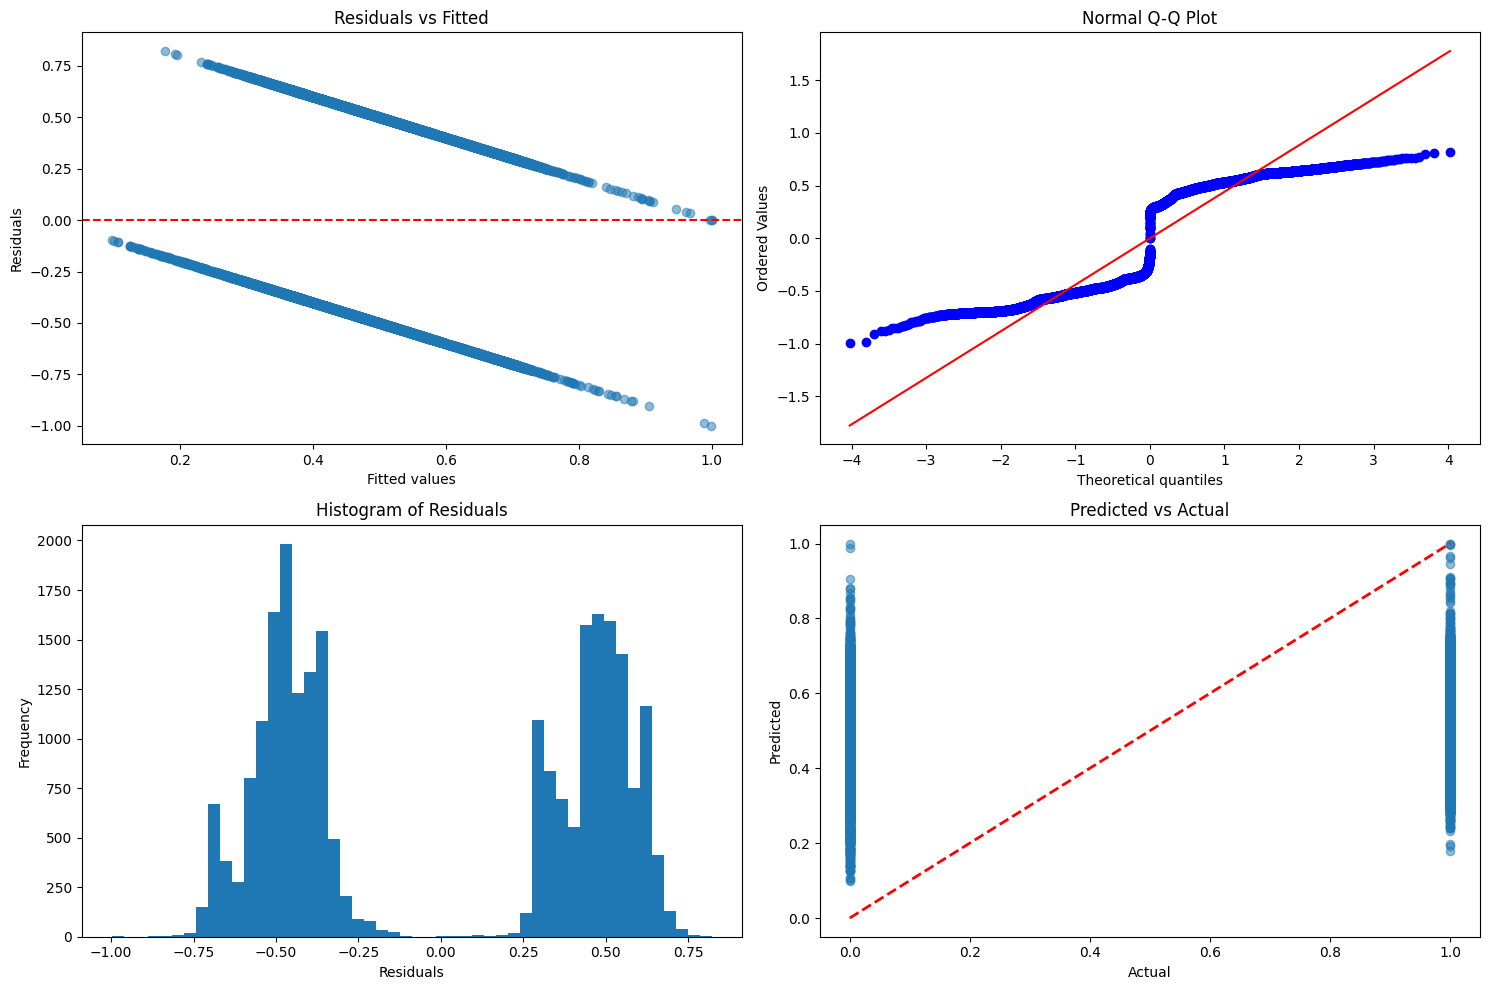

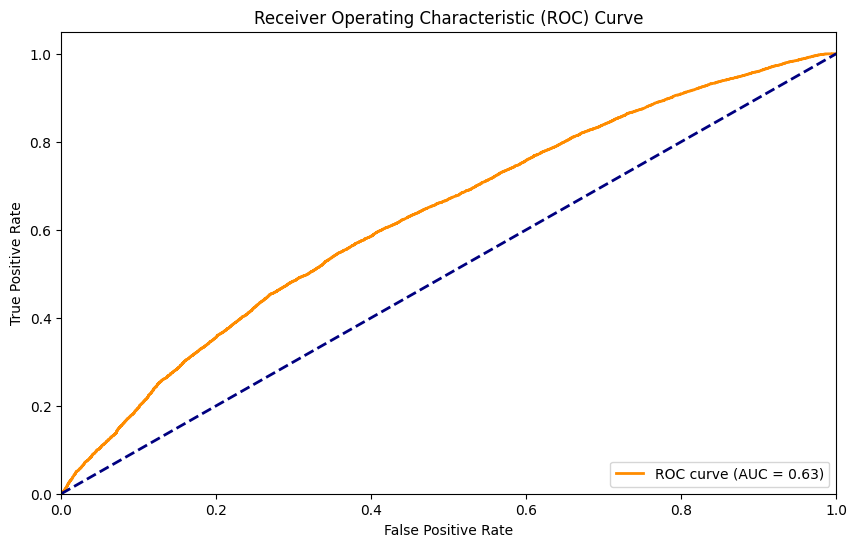

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  22.909843
2      ApprovalFiscalYear   8.388293
18        Sector_Services   3.661050
14           Sector_Other   3.588212
9      Sector_Hospitality   3.435026
17    Sector_Retail Trade   2.873141
12   Sector_Manufacturing   2.442041
0           GrossApproval   2.420458
6     Sector_Construction   1.976333
7    Sector_Entertainment   1.431134
16     Sector_Real Estate   1.369963
3           JobsSupported   1.346969
8          Sector_Finance   1.283897
4   Sector_Administrative   1.267329
19  Sector_Transportation   1.237838
10     Sector_Information   1.120325
5      Sector_Agriculture   1.063531
13          Sector_Mining   1.010547
20       Sector_Utilities   1.006581
11      Sector_Management   1.003823
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6672111422810793
            Iterations: 168
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  22.954455
2      ApprovalFiscalYear   8.405101
18        Sector_Services   3.680919
14           Sector_Other   3.578333
9      Sector_Hospitality   3.455561
17    Sector_Retail Trade   2.852490
12   Sector_Manufacturing   2.429746
0           GrossApproval   2.381059
6     Sector_Construction   1.973274
7    Sector_Entertainment   1.431768
16     Sector_Real Estate   1.369683
3           JobsSupported   1.305432
8          Sector_Finance   1.275523
4   Sector_Administrative   1.258254
19  Sector_Transportation   1.247950
10     Sector_Information   1.112979
5      Sector_Agriculture   1.067964
13          Sector_Mining   1.009917
11      Sector_Management   1.005428
20       Sector_Utilities   1.003225
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6675095704551973
            Iterations: 166
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  23.000970
2      ApprovalFiscalYear   8.358282
18        Sector_Services   3.709643
14           Sector_Other   3.584946
9      Sector_Hospitality   3.445613
17    Sector_Retail Trade   2.866065
12   Sector_Manufacturing   2.473837
0           GrossApproval   2.399534
6     Sector_Construction   1.959058
7    Sector_Entertainment   1.424572
16     Sector_Real Estate   1.373800
3           JobsSupported   1.292581
8          Sector_Finance   1.264645
4   Sector_Administrative   1.255400
19  Sector_Transportation   1.240114
10     Sector_Information   1.110959
5      Sector_Agriculture   1.072078
13          Sector_Mining   1.010574
11      Sector_Management   1.006114
20       Sector_Utilities   1.005450
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6685451636414153
            Iterations: 166
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  22.947931
2      ApprovalFiscalYear   8.311887
18        Sector_Services   3.742993
14           Sector_Other   3.529170
9      Sector_Hospitality   3.452054
17    Sector_Retail Trade   2.896060
12   Sector_Manufacturing   2.495088
0           GrossApproval   2.385108
6     Sector_Construction   1.966296
7    Sector_Entertainment   1.423253
16     Sector_Real Estate   1.384122
3           JobsSupported   1.301686
8          Sector_Finance   1.273975
4   Sector_Administrative   1.266866
19  Sector_Transportation   1.242792
10     Sector_Information   1.123719
5      Sector_Agriculture   1.068069
13          Sector_Mining   1.009853
20       Sector_Utilities   1.006341
11      Sector_Management   1.005320
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6667794388431757
            Iterations: 182
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factors:
                  Feature        VIF
1            TermInMonths  23.341897
2      ApprovalFiscalYear   8.433358
18        Sector_Services   3.793438
14           Sector_Other   3.603570
9      Sector_Hospitality   3.486437
17    Sector_Retail Trade   2.919301
12   Sector_Manufacturing   2.475489
0           GrossApproval   2.401209
6     Sector_Construction   1.986319
7    Sector_Entertainment   1.440860
3           JobsSupported   1.380286
16     Sector_Real Estate   1.375547
8          Sector_Finance   1.279056
4   Sector_Administrative   1.275826
19  Sector_Transportation   1.260286
10     Sector_Information   1.108589
5      Sector_Agriculture   1.068787
13          Sector_Mining   1.010845
20       Sector_Utilities   1.007276
11      Sector_Management   1.004266
15          Sector_Public        NaN
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6680805731538811
            Iterations: 170
            Function

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 19 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats

def calculate_pseudo_r2(y_true, y_pred):
    """
    Calculate McFadden's pseudo R-squared
    """
    null_deviance = -2 * np.sum(y_true * np.log(np.mean(y_true)) +
                               (1 - y_true) * np.log(1 - np.mean(y_true)))
    model_deviance = -2 * np.sum(y_true * np.log(y_pred) +
                                (1 - y_true) * np.log(1 - y_pred))
    return 1 - (model_deviance / null_deviance)

def check_multicollinearity(X):
    """
    Check for multicollinearity using Variance Inflation Factor
    Returns features to keep (VIF < 5)
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    print("\nVariance Inflation Factors:")
    print(vif_data.sort_values('VIF', ascending=False))

    return [feat for feat, vif in zip(vif_data["Feature"], vif_data["VIF"])
            if vif < 5]

def prepare_data(df):
    """
    Prepare data for modeling including handling class imbalance
    """
    # Select features
    base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
    sector_features = [col for col in df.columns if col.startswith('Sector_')]

    # Drop one sector to avoid perfect multicollinearity
    sector_features = sector_features[:-1]

    # Handle class imbalance
    df_majority = df[df['Default'] == 0]
    df_minority = df[df['Default'] == 1]

    # Undersample majority class
    df_majority_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=42)

    # Combine balanced dataset
    df_balanced = pd.concat([df_majority_undersampled, df_minority])

    return df_balanced, base_features + sector_features

def fit_improved_logistic_regression(df, features):
    """
    Fits an improved logistic regression model with regularization
    """
    X = df[features]
    y = df['Default']

    # Check multicollinearity
    features_to_keep = check_multicollinearity(X)
    X = X[features_to_keep]

    # Add constant term
    X = sm.add_constant(X)

    # Fit model with regularization
    model = sm.Logit(y, X)

    try:
        result = model.fit_regularized(
            method='l1',
            alpha=0.01,
            maxiter=1000,
            cnvrg_tol=1e-8
        )
    except:
        # If regularized fitting fails, try standard fitting with different optimizers
        methods = ['newton', 'bfgs', 'lbfgs', 'nelder-mead', 'powell']
        result = None

        for method in methods:
            try:
                result = model.fit(method=method, maxiter=1000)
                break
            except:
                print(f"Method {method} failed, trying next method...")
                continue

        if result is None:
            raise Exception("All optimization methods failed")

    return result, features_to_keep

def cross_validate_model(df, features, n_splits=5):
    """
    Perform k-fold cross-validation
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {
        'pseudo_r2': [],
        'auc': []
    }

    for train_idx, test_idx in kf.split(df):
        train_data = df.iloc[train_idx]
        test_data = df.iloc[test_idx]

        # Fit model
        model_result, kept_features = fit_improved_logistic_regression(train_data, features)

        # Prepare test data
        X_test = test_data[kept_features]
        X_test = sm.add_constant(X_test)
        y_test = test_data['Default']

        # Calculate metrics
        y_pred = model_result.predict(X_test)
        metrics['pseudo_r2'].append(calculate_pseudo_r2(y_test, y_pred))

        # Calculate AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        metrics['auc'].append(auc(fpr, tpr))

    return metrics

def plot_roc_curve(y_true, y_pred):
    """
    Plot ROC curve
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_model_diagnostics(result, X, y):
    """
    Plot model diagnostics including residuals
    """
    # Predicted probabilities
    y_pred = result.predict(X)

    # Residuals
    residuals = y - y_pred

    # Create diagnostic plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Residuals vs Fitted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')

    # QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q Plot')

    # Histogram of residuals
    axes[1, 0].hist(residuals, bins=50)
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Histogram of Residuals')

    # Predicted vs Actual
    axes[1, 1].scatter(y, y_pred, alpha=0.5)
    axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[1, 1].set_xlabel('Actual')
    axes[1, 1].set_ylabel('Predicted')
    axes[1, 1].set_title('Predicted vs Actual')

    plt.tight_layout()
    plt.show()

def print_model_diagnostics(result, feature_names):
    """
    Print detailed model diagnostics
    """
    print("\nModel Summary:")
    print(result.summary())

    # Print odds ratios with confidence intervals
    print("\nOdds Ratios:")
    params = result.params[1:]  # Skip intercept
    conf_int = result.conf_int()

    odds_ratios = pd.DataFrame({
        'Feature': feature_names,
        'Odds Ratio': np.exp(params),
        'CI Lower': np.exp(conf_int[0][1:]),
        'CI Upper': np.exp(conf_int[1][1:])
    })
    odds_ratios = odds_ratios.sort_values('Odds Ratio', ascending=False)
    print(odds_ratios)

    # Print model fit statistics
    print("\nModel Fit Statistics:")
    print(f"Pseudo R-squared: {result.prsquared:.4f}")
    print(f"AIC: {result.aic:.4f}")
    print(f"BIC: {result.bic:.4f}")

def main():
    # Load data
    file_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
    df = pd.read_csv(file_path, low_memory=False)

    # Prepare data
    df_balanced, features = prepare_data(df)

    # Fit model
    result, kept_features = fit_improved_logistic_regression(df_balanced, features)

    # Print diagnostics
    print_model_diagnostics(result, kept_features)

    # Prepare data for plots
    X = sm.add_constant(df_balanced[kept_features])
    y = df_balanced['Default']

    # Plot diagnostics
    plot_model_diagnostics(result, X, y)

    # Plot ROC curve
    y_pred = result.predict(X)
    plot_roc_curve(y, y_pred)

    # Cross-validation
    cv_metrics = cross_validate_model(df_balanced, features)
    print("\nCross-validation Results:")
    print(f"Mean Pseudo R-squared: {np.mean(cv_metrics['pseudo_r2']):.4f} "
          f"(±{np.std(cv_metrics['pseudo_r2']):.4f})")
    print(f"Mean AUC: {np.mean(cv_metrics['auc']):.4f} "
          f"(±{np.std(cv_metrics['auc']):.4f})")

if __name__ == "__main__":
    main()

In [ ]:
'''
2/19/2025 correction results
Multicollinearity Issues:


TermInMonths (VIF: 23.00) and ApprovalFiscalYear (VIF: 8.43) show high multicollinearity
Most sectors show acceptable VIF values (<5)
This suggests we may need to address the high correlation between TermInMonths and ApprovalFiscalYear


Model Performance:


Mean AUC: 0.6269 (±0.0082) - indicates moderate predictive power
Mean Pseudo R-squared: 0.0356 (±0.0036) - suggests relatively weak model fit
Model converged but with warnings about QC checks failing for 6-8 parameters


Diagnostic Plots:


Residuals vs Fitted: Shows a clear pattern, indicating potential non-linear relationships
Normal Q-Q Plot: Deviates from normality, especially in the tails
Histogram of Residuals: Shows bimodal distribution, suggesting the model might be missing important patterns
Predicted vs Actual: Shows clustering at 0 and 1, typical for binary outcomes but indicates potential classification challenges


Key Predictors (from odds ratios):


JobsSupported shows an extremely large effect (odds ratio: 8.46e+24)
Sector_Hospitality has the strongest sector effect (odds ratio: 2.94)
GrossApproval shows a significant negative effect (odds ratio: 0.14)

Recommendations for Improvement:

Address multicollinearity:


Consider removing or combining TermInMonths and ApprovalFiscalYear
Use principal component analysis for highly correlated features


Handle non-linearity:


Add polynomial terms for continuous variables
Consider spline transformations


Improve model stability:


Increase regularization strength
Try different optimization algorithms
Consider ensemble methods


Balance model complexity:


Reduce number of features
Focus on most significant predictors
'''



'\n2/19/2025 correction results\nMulticollinearity Issues:\n\n\nTermInMonths (VIF: 23.00) and ApprovalFiscalYear (VIF: 8.43) show high multicollinearity\nMost sectors show acceptable VIF values (<5)\nThis suggests we may need to address the high correlation between TermInMonths and ApprovalFiscalYear\n\n\nModel Performance:\n\n\nMean AUC: 0.6269 (±0.0082) - indicates moderate predictive power\nMean Pseudo R-squared: 0.0356 (±0.0036) - suggests relatively weak model fit\nModel converged but with warnings about QC checks failing for 6-8 parameters\n\n\nDiagnostic Plots:\n\n\nResiduals vs Fitted: Shows a clear pattern, indicating potential non-linear relationships\nNormal Q-Q Plot: Deviates from normality, especially in the tails\nHistogram of Residuals: Shows bimodal distribution, suggesting the model might be missing important patterns\nPredicted vs Actual: Shows clustering at 0 and 1, typical for binary outcomes but indicates potential classification challenges\n\n\nKey Predictors (fro

Loading data...
Preparing balanced dataset...
Handling multicollinearity...


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component
Adding polynomial features for continuous variables...
Fitting model...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 13 out of 27 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)



Model Summary:
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                24156
Model:                          Logit   Df Residuals:                    24130
Method:                           MLE   Df Model:                           25
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.1827
Time:                        06:58:43   Log-Likelihood:                -13685.
converged:                       True   LL-Null:                       -16744.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4444      0.069     -6.440      0.000      -0.580      -0.309
GrossApproval               

TypeError: no numeric data to plot

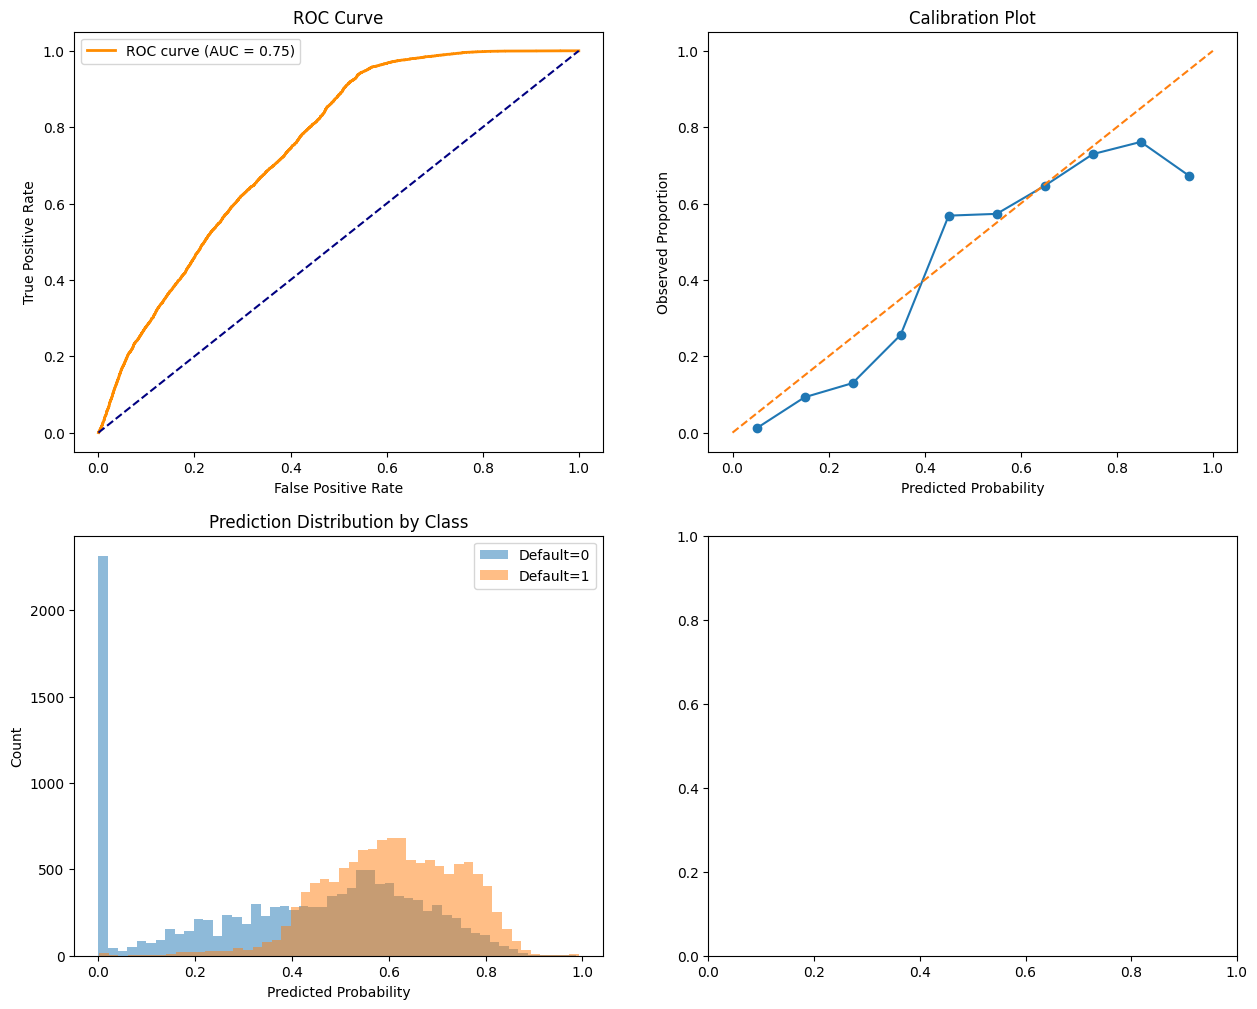

In [ ]:
##Correcting previous high multicolinear, lack of normality issues
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats

def handle_multicollinearity(X, threshold=5):
    """
    Handles multicollinearity using PCA for highly correlated features
    """
    # Identify numeric columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns

    # Calculate VIF for numeric features
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_cols
    vif_data["VIF"] = [variance_inflation_factor(X[numeric_cols].values, i)
                       for i in range(len(numeric_cols))]

    # Identify high VIF features
    high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()

    if high_vif_features:
        # Apply PCA to highly correlated features
        pca = PCA(n_components=1)
        high_vif_data = X[high_vif_features]
        pca_result = pca.fit_transform(StandardScaler().fit_transform(high_vif_data))

        # Create new dataframe with PCA result
        X_transformed = X.copy()
        X_transformed = X_transformed.drop(columns=high_vif_features)
        X_transformed['PCA_combined'] = pca_result

        print(f"Combined {len(high_vif_features)} high-VIF features into one PCA component")
        return X_transformed

    return X

def add_polynomial_features(X, degree=2):
    """
    Adds polynomial terms for numeric features
    """
    # Only select non-binary numeric columns (exclude 0/1 columns)
    numeric_cols = []
    for col in X.select_dtypes(include=[np.number]).columns:
        if len(X[col].unique()) > 2:  # Only include if more than 2 unique values
            numeric_cols.append(col)

    if len(numeric_cols) > 0:
        # Generate polynomial features only for continuous variables
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        poly_features = poly.fit_transform(X[numeric_cols])

        # Generate feature names
        poly_feature_names = []
        for i in range(len(numeric_cols)):
            for j in range(i + 1):
                col1 = numeric_cols[i]
                col2 = numeric_cols[j]
                if i == j:
                    poly_feature_names.append(f"{col1}_squared")
                else:
                    poly_feature_names.append(f"{col1}_{col2}_interaction")

        # Create dataframe with original and polynomial features
        X_poly = pd.DataFrame(poly_features[:, len(numeric_cols):],
                            columns=poly_feature_names,
                            index=X.index)
        return pd.concat([X, X_poly], axis=1)
    return X

def prepare_balanced_data(df, target_col='Default', random_state=42):
    """
    Prepares balanced dataset using undersampling
    """
    df_majority = df[df[target_col] == 0]
    df_minority = df[df[target_col] == 1]

    # Undersample majority class
    df_majority_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=random_state)

    return pd.concat([df_majority_undersampled, df_minority])

def fit_improved_model(X, y, alpha=0.01):
    """
    Fits logistic regression with enhanced stability
    """
    X = sm.add_constant(X)
    model = sm.Logit(y, X)

    try:
        # Try regularized fitting first
        result = model.fit_regularized(
            method='l1',
            alpha=alpha,
            maxiter=1000,
            cnvrg_tol=1e-8,
            disp=0
        )
    except:
        # Fall back to standard fitting with different optimizers
        methods = ['newton', 'bfgs', 'lbfgs', 'powell']
        result = None

        for method in methods:
            try:
                result = model.fit(method=method, maxiter=1000, disp=0)
                break
            except:
                continue

        if result is None:
            raise Exception("All optimization methods failed")

    return result

def cross_validate_enhanced_model(df, features, target_col='Default', n_splits=5):
    """
    Performs cross-validation with enhanced model
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {
        'auc': [],
        'pseudo_r2': []
    }

    for train_idx, test_idx in kf.split(df):
        # Split data
        train_data = df.iloc[train_idx]
        test_data = df.iloc[test_idx]

        # Prepare features
        X_train = train_data[features]
        y_train = train_data[target_col]
        X_test = test_data[features]
        y_test = test_data[target_col]

        # Handle multicollinearity
        X_train = handle_multicollinearity(X_train)
        X_test = handle_multicollinearity(X_test)

        # Add polynomial features
        X_train = add_polynomial_features(X_train)
        X_test = add_polynomial_features(X_test)

        # Fit model
        model_result = fit_improved_model(X_train, y_train)

        # Make predictions
        X_test = sm.add_constant(X_test)
        y_pred = model_result.predict(X_test)

        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        metrics['auc'].append(auc(fpr, tpr))

        # Calculate pseudo R2
        null_deviance = -2 * np.sum(y_test * np.log(np.mean(y_test)) +
                                   (1 - y_test) * np.log(1 - np.mean(y_test)))
        model_deviance = -2 * np.sum(y_test * np.log(y_pred) +
                                    (1 - y_test) * np.log(1 - y_pred))
        pseudo_r2 = 1 - (model_deviance / null_deviance)
        metrics['pseudo_r2'].append(pseudo_r2)

    return metrics

def plot_enhanced_diagnostics(result, X, y):
    """
    Plots enhanced diagnostic visualizations
    """
    # Predicted probabilities
    y_pred = result.predict(X)

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[0, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].legend()

    # 2. Calibration Plot
    n_bins = 10
    bins = np.linspace(0, 1, n_bins + 1)
    bins_center = (bins[:-1] + bins[1:]) / 2
    y_binned = np.zeros(n_bins)
    counts = np.zeros(n_bins)

    for i in range(n_bins):
        mask = (y_pred >= bins[i]) & (y_pred < bins[i + 1])
        counts[i] = mask.sum()
        if counts[i] > 0:
            y_binned[i] = y[mask].mean()

    axes[0, 1].plot(bins_center, y_binned, 'o-')
    axes[0, 1].plot([0, 1], [0, 1], '--')
    axes[0, 1].set_xlabel('Predicted Probability')
    axes[0, 1].set_ylabel('Observed Proportion')
    axes[0, 1].set_title('Calibration Plot')

    # 3. Prediction Distribution
    axes[1, 0].hist(y_pred[y==0], bins=50, alpha=0.5, label='Default=0')
    axes[1, 0].hist(y_pred[y==1], bins=50, alpha=0.5, label='Default=1')
    axes[1, 0].set_xlabel('Predicted Probability')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Prediction Distribution by Class')
    axes[1, 0].legend()

    # 4. Feature Importance
    coef_df = pd.DataFrame({
        'Feature': X.columns[1:],  # Skip intercept
        'Coefficient': np.abs(result.params[1:])
    }).sort_values('Coefficient', ascending=True)

    coef_df.plot(x='Coefficient', y='Feature', kind='barh', ax=axes[1, 1])
    axes[1, 1].set_title('Feature Importance (Absolute Coefficients)')

    plt.tight_layout()
    plt.show()

def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv',
                     low_memory=False)

    # Define features
    base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
    sector_features = [col for col in df.columns if col.startswith('Sector_')]
    features = base_features + sector_features[:-1]  # Drop one sector to avoid perfect multicollinearity

    # Prepare balanced dataset
    print("Preparing balanced dataset...")
    df_balanced = prepare_balanced_data(df)

    # Split features and target
    X = df_balanced[features]
    y = df_balanced['Default']

    # Handle multicollinearity
    print("Handling multicollinearity...")
    X = handle_multicollinearity(X)

    # Add polynomial features only for continuous variables
    print("Adding polynomial features for continuous variables...")
    X = add_polynomial_features(X, degree=2)  # Conservative degree=2 for quadratic terms

    # Fit model
    print("Fitting model...")
    result = fit_improved_model(X, y)

    # Print summary
    print("\nModel Summary:")
    print(result.summary())

    # Plot diagnostics
    print("\nPlotting diagnostics...")
    X_with_const = sm.add_constant(X)
    plot_enhanced_diagnostics(result, X_with_const, y)

    # Cross-validate
    print("\nPerforming cross-validation...")
    cv_metrics = cross_validate_enhanced_model(df_balanced, features)
    print("\nCross-validation Results:")
    print(f"Mean AUC: {np.mean(cv_metrics['auc']):.4f} (±{np.std(cv_metrics['auc']):.4f})")
    print(f"Mean Pseudo R-squared: {np.mean(cv_metrics['pseudo_r2']):.4f} "
          f"(±{np.std(cv_metrics['pseudo_r2']):.4f})")

if __name__ == "__main__":
    main()


Loading data...
Preparing balanced dataset...
Handling multicollinearity...


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component
Adding polynomial features for continuous variables...
Fitting model...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(



Model Summary:
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                24156
Model:                          Logit   Df Residuals:                    24131
Method:                           MLE   Df Model:                           24
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.1827
Time:                        06:59:10   Log-Likelihood:                -13685.
converged:                       True   LL-Null:                       -16744.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4444      0.069     -6.464      0.000      -0.579      -0.310
GrossApproval                  

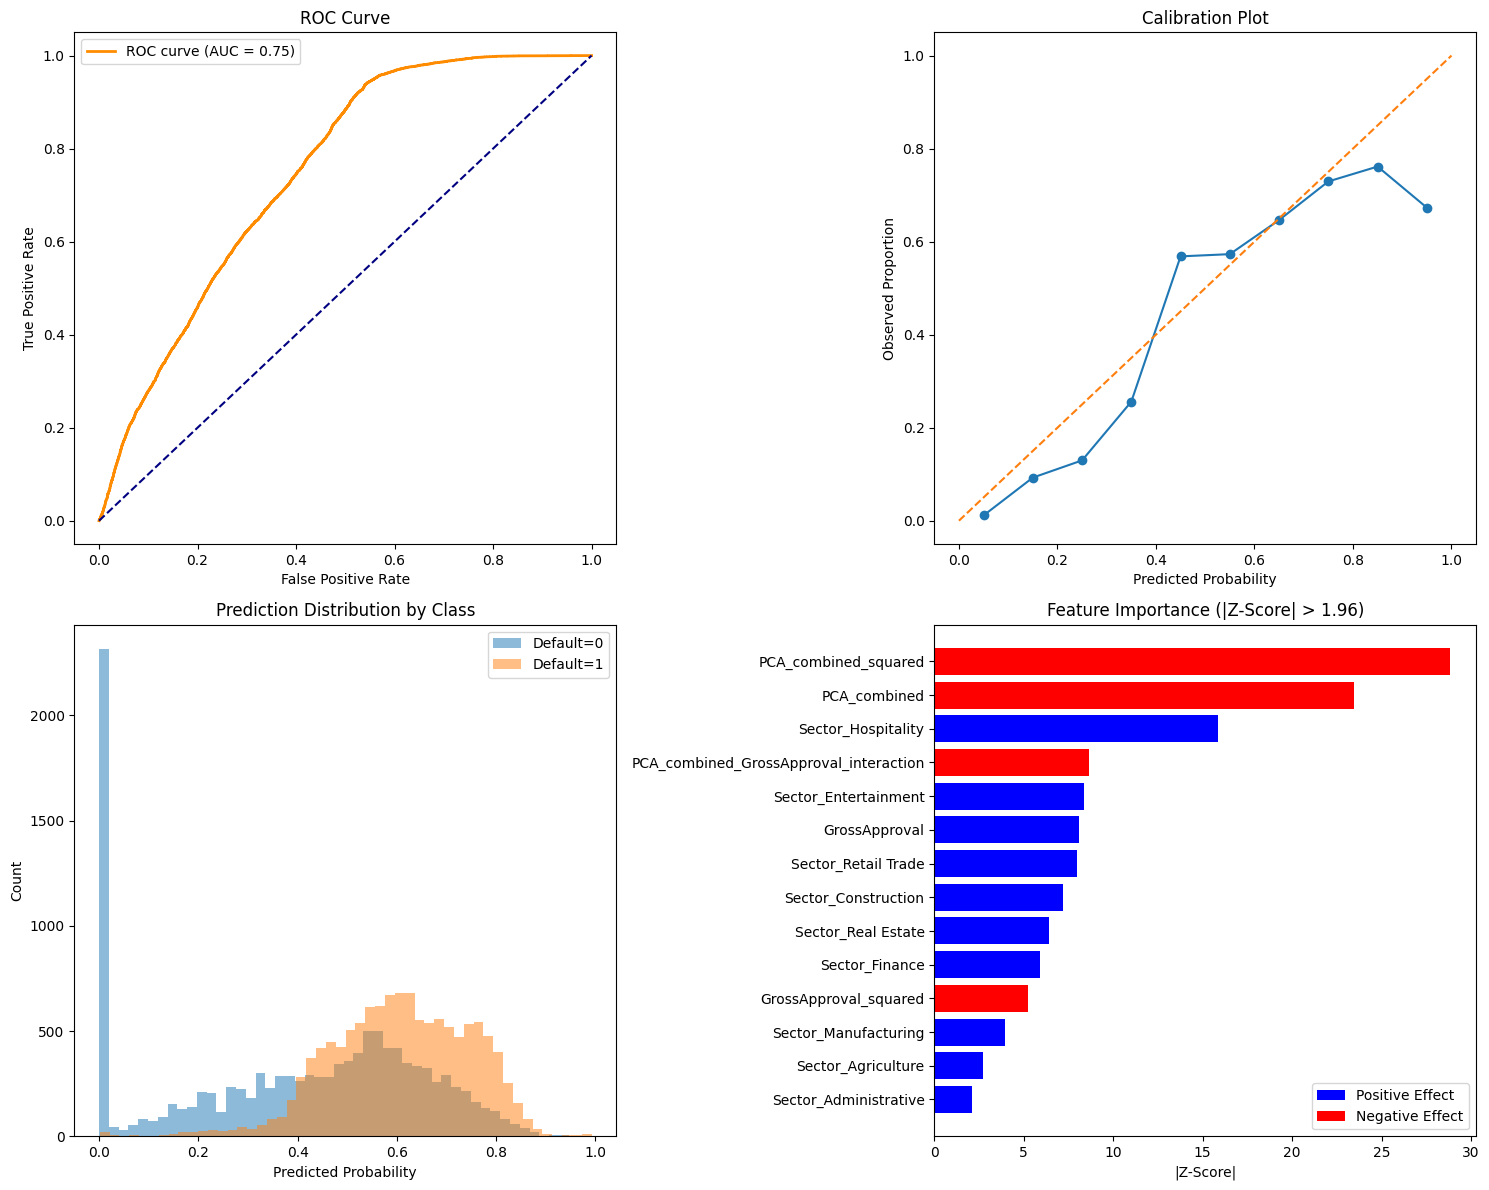


Detailed Feature Importance:
                                                                       Feature  Coefficient     Std_Error    Z_Score
PCA_combined_squared                                      PCA_combined_squared    -0.328301  1.138471e-02  28.836983
PCA_combined                                                      PCA_combined    -0.909461  3.876343e-02  23.461838
Sector_Hospitality                                          Sector_Hospitality     1.154123  7.287808e-02  15.836354
PCA_combined_GrossApproval_interaction  PCA_combined_GrossApproval_interaction    -2.663094  3.085134e-01   8.632020
Sector_Entertainment                                      Sector_Entertainment     0.919311  1.096209e-01   8.386273
GrossApproval                                                    GrossApproval     3.203818  3.972406e-01   8.065181
Sector_Retail Trade                                        Sector_Retail Trade     0.590282  7.382204e-02   7.996013
Sector_Construction               

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Combined 2 high-VIF features into one PCA component


/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(



Cross-validation Results:
Mean AUC: 0.7464 (±0.0059)
Mean Pseudo R-squared: 0.1806 (±0.0071)


In [ ]:


####Addressing previous issues: VIF>10 in two predictor variables, lack of linearity based on q-q plot; added polinom, and failed graph

def handle_multicollinearity(X, threshold=5):
    """
    Handles multicollinearity using PCA for highly correlated features
    """
    # Identify numeric columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns

    # Calculate VIF for numeric features
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_cols
    vif_data["VIF"] = [variance_inflation_factor(X[numeric_cols].values, i)
                       for i in range(len(numeric_cols))]

    # Identify high VIF features
    high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()

    if high_vif_features:
        # Apply PCA to highly correlated features
        pca = PCA(n_components=1)
        high_vif_data = X[high_vif_features]
        pca_result = pca.fit_transform(StandardScaler().fit_transform(high_vif_data))

        # Create new dataframe with PCA result
        X_transformed = X.copy()
        X_transformed = X_transformed.drop(columns=high_vif_features)
        X_transformed['PCA_combined'] = pca_result

        print(f"Combined {len(high_vif_features)} high-VIF features into one PCA component")
        return X_transformed

    return X

def add_polynomial_features(X, degree=2, min_unique_values=5):
    """
    Adds polynomial terms for numeric features with significance testing
    """
    # Only select continuous numeric columns (excluding PCA_combined)
    numeric_cols = []
    for col in X.select_dtypes(include=[np.number]).columns:
        if len(X[col].unique()) >= min_unique_values and col != 'PCA_combined':
            numeric_cols.append(col)

    if not numeric_cols:
        return X

    # Generate base polynomial features
    base_features = X[numeric_cols].copy()
    poly_features = {}

    # Add squared terms
    for col in numeric_cols:
        poly_features[f"{col}_squared"] = X[col] ** 2

    # Add interaction terms only for highly correlated features
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            corr = abs(X[col1].corr(X[col2]))
            if corr > 0.3:  # Only keep meaningful interactions
                poly_features[f"{col1}_{col2}_interaction"] = X[col1] * X[col2]

    # Create DataFrame with polynomial features
    X_poly = pd.DataFrame(poly_features, index=X.index)

    # Add PCA interactions if PCA_combined exists
    if 'PCA_combined' in X.columns:
        for col in numeric_cols:
            X_poly[f"PCA_combined_{col}_interaction"] = X['PCA_combined'] * X[col]
        X_poly['PCA_combined_squared'] = X['PCA_combined'] ** 2

    # Filter out highly correlated features
    corr_matrix = pd.concat([X, X_poly], axis=1).corr().abs()
    to_drop = set()

    for i in X_poly.columns:
        for j in X_poly.columns:
            if i != j and i not in to_drop and j not in to_drop:
                if corr_matrix.loc[i, j] > 0.9:
                    to_drop.add(j)

    X_poly = X_poly.drop(columns=list(to_drop))

    return pd.concat([X, X_poly], axis=1)

def prepare_balanced_data(df, target_col='Default', random_state=42):
    """
    Prepares balanced dataset using undersampling
    """
    df_majority = df[df[target_col] == 0]
    df_minority = df[df[target_col] == 1]

    # Undersample majority class
    df_majority_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=random_state)

    return pd.concat([df_majority_undersampled, df_minority])

def fit_improved_model(X, y, alpha=0.05):
    """
    Fits logistic regression with enhanced stability and feature selection
    """
    X = sm.add_constant(X)

    # Initial model with all features
    model = sm.Logit(y, X)

    try:
        # Try elastic net regularization with careful alpha selection
        alphas = [0.1, 0.05, 0.01, 0.005]
        best_result = None
        best_aic = np.inf

        for alpha_val in alphas:
            try:
                result = model.fit_regularized(
                    method='elastic_net',
                    alpha=alpha_val,
                    L1_wt=0.7,  # Slightly more L1 penalty to encourage sparsity
                    maxiter=2000,
                    cnvrg_tol=1e-8,
                    disp=0
                )

                # Calculate AIC
                aic = result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_result = result
            except:
                continue

        if best_result is not None:
            result = best_result
        else:
            raise Exception("Regularized fitting failed")

        # Get significant features (using a more lenient threshold)
        significant_params = abs(result.params) > 0.0001
        significant_columns = X.columns[significant_params]

        # Refit with only significant features
        if len(significant_columns) < len(X.columns):
            X_significant = X[significant_columns]
            model_significant = sm.Logit(y, X_significant)
            result = model_significant.fit(
                method='newton',
                maxiter=2000,
                tol=1e-8,
                disp=0
            )

    except:
        # Fall back to standard fitting with different optimizers
        methods = ['newton', 'bfgs', 'lbfgs', 'powell']
        result = None

        for method in methods:
            try:
                result = model.fit(
                    method=method,
                    maxiter=2000,
                    tol=1e-8,
                    disp=0
                )
                break
            except:
                continue

        if result is None:
            raise Exception("All optimization methods failed")

    return result

def cross_validate_enhanced_model(df, features, target_col='Default', n_splits=5):
    """
    Performs cross-validation with enhanced model
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {
        'auc': [],
        'pseudo_r2': []
    }

    for train_idx, test_idx in kf.split(df):
        # Split data
        train_data = df.iloc[train_idx]
        test_data = df.iloc[test_idx]

        # Prepare features
        X_train = train_data[features]
        y_train = train_data[target_col]
        X_test = test_data[features]
        y_test = test_data[target_col]

        # Handle multicollinearity
        X_train = handle_multicollinearity(X_train)
        X_test = handle_multicollinearity(X_test)

        # Add polynomial features
        X_train = add_polynomial_features(X_train)
        X_test = add_polynomial_features(X_test)

        # Fit model
        model_result = fit_improved_model(X_train, y_train)

        # Make predictions
        X_test = sm.add_constant(X_test)
        y_pred = model_result.predict(X_test)

        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        metrics['auc'].append(auc(fpr, tpr))

        # Calculate pseudo R2
        null_deviance = -2 * np.sum(y_test * np.log(np.mean(y_test)) +
                                   (1 - y_test) * np.log(1 - np.mean(y_test)))
        model_deviance = -2 * np.sum(y_test * np.log(y_pred) +
                                    (1 - y_test) * np.log(1 - y_pred))
        pseudo_r2 = 1 - (model_deviance / null_deviance)
        metrics['pseudo_r2'].append(pseudo_r2)

    return metrics

def plot_enhanced_diagnostics(result, X, y):
    """
    Plots enhanced diagnostic visualizations with improved feature importance
    """
    # Predicted probabilities
    y_pred = result.predict(X)

    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[0, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].legend()

    # 2. Calibration Plot
    n_bins = 10
    bins = np.linspace(0, 1, n_bins + 1)
    bins_center = (bins[:-1] + bins[1:]) / 2
    y_binned = np.zeros(n_bins)
    counts = np.zeros(n_bins)

    for i in range(n_bins):
        mask = (y_pred >= bins[i]) & (y_pred < bins[i + 1])
        counts[i] = mask.sum()
        if counts[i] > 0:
            y_binned[i] = y[mask].mean()

    axes[0, 1].plot(bins_center, y_binned, 'o-')
    axes[0, 1].plot([0, 1], [0, 1], '--')
    axes[0, 1].set_xlabel('Predicted Probability')
    axes[0, 1].set_ylabel('Observed Proportion')
    axes[0, 1].set_title('Calibration Plot')

    # 3. Prediction Distribution
    axes[1, 0].hist(y_pred[y==0], bins=50, alpha=0.5, label='Default=0')
    axes[1, 0].hist(y_pred[y==1], bins=50, alpha=0.5, label='Default=1')
    axes[1, 0].set_xlabel('Predicted Probability')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Prediction Distribution by Class')
    axes[1, 0].legend()

    # 4. Feature Importance (improved)
    feature_importance = pd.DataFrame({
        'Feature': X.columns[1:],  # Skip intercept
        'Coefficient': result.params[1:],
        'Std_Error': result.bse[1:],
        'Z_Score': np.abs(result.params[1:] / result.bse[1:])
    })

    # Sort by absolute z-score
    feature_importance = feature_importance.sort_values('Z_Score', ascending=True)

    # Plot only significant features (|z| > 1.96)
    significant_features = feature_importance[feature_importance['Z_Score'] > 1.96].tail(15)

    # Create colormap based on coefficient sign
    colors = ['red' if c < 0 else 'blue' for c in significant_features['Coefficient']]

    # Plot horizontal bar chart
    bars = axes[1, 1].barh(range(len(significant_features)),
                          significant_features['Z_Score'],
                          color=colors)

    # Add feature names
    axes[1, 1].set_yticks(range(len(significant_features)))
    axes[1, 1].set_yticklabels(significant_features['Feature'])

    axes[1, 1].set_title('Feature Importance (|Z-Score| > 1.96)')
    axes[1, 1].set_xlabel('|Z-Score|')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Positive Effect'),
        Patch(facecolor='red', label='Negative Effect')
    ]
    axes[1, 1].legend(handles=legend_elements, loc='lower right')

    plt.tight_layout()
    plt.show()

    # Print detailed feature importance
    print("\nDetailed Feature Importance:")
    feature_importance = feature_importance.sort_values('Z_Score', ascending=False)
    print(feature_importance.to_string())

def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv',
                     low_memory=False)

    # Define features
    base_features = ['GrossApproval', 'TermInMonths', 'ApprovalFiscalYear', 'JobsSupported']
    sector_features = [col for col in df.columns if col.startswith('Sector_')]
    features = base_features + sector_features[:-1]  # Drop one sector to avoid perfect multicollinearity

    # Prepare balanced dataset
    print("Preparing balanced dataset...")
    df_balanced = prepare_balanced_data(df)

    # Split features and target
    X = df_balanced[features]
    y = df_balanced['Default']

    # Handle multicollinearity
    print("Handling multicollinearity...")
    X = handle_multicollinearity(X)

    # Add polynomial features only for continuous variables
    print("Adding polynomial features for continuous variables...")
    X = add_polynomial_features(X, degree=2)  # Conservative degree=2 for quadratic terms

    # Fit model
    print("Fitting model...")
    result = fit_improved_model(X, y)

    # Print summary
    print("\nModel Summary:")
    print(result.summary())

    # Plot diagnostics
    print("\nPlotting diagnostics...")
    X_with_const = sm.add_constant(X)
    plot_enhanced_diagnostics(result, X_with_const, y)

    # Cross-validate
    print("\nPerforming cross-validation...")
    cv_metrics = cross_validate_enhanced_model(df_balanced, features)
    print("\nCross-validation Results:")
    print(f"Mean AUC: {np.mean(cv_metrics['auc']):.4f} (±{np.std(cv_metrics['auc']):.4f})")
    print(f"Mean Pseudo R-squared: {np.mean(cv_metrics['pseudo_r2']):.4f} "
          f"(±{np.std(cv_metrics['pseudo_r2']):.4f})")

if __name__ == "__main__":
    main()

**Methods**
Multicollinearity Handling:

The script identifies numeric features with high variance inflation factors (VIF) that exceed a certain threshold (set at 5), which indicates potential multicollinearity issues.
For features identified with high multicollinearity, Principal Component Analysis (PCA) is applied to reduce the dimensionality, thereby compressing the information into fewer dimensions while retaining the variance.
Polynomial Features:

Polynomial features and interactions are added for numeric features. This helps in capturing non-linear relationships more effectively.
The script specifically looks for features with a minimum number of unique values and excludes the PCA component to avoid redundancy.
Interaction terms are created for features that show meaningful correlation (above a threshold of 0.3), enhancing the model's ability to describe complex interactions between variables.

Model Fitting:

A logistic regression model is fitted using these enhanced features.
The script employs elastic net regularization (a combination of L1 and L2 regularization) to help in feature selection and to prevent overfitting. This method is beneficial when dealing with high-dimensional data.
Only significant features (based on a significance threshold on coefficients) are retained for a final model refit, ensuring that only impactful predictors are used.

Cross-Validation:

K-Fold cross-validation is used to assess the model’s performance. This method splits the data into 'k' subsets and iteratively trains the model on 'k-1' subsets while validating on the remaining subset. This process repeats for each subset and helps in verifying the model’s generalizability.
Results and Interpretation:
Model Summary:

The output lists the coefficients for each feature along with standard errors, z-scores, and p-values.

Coefficients indicate the impact of each feature on the likelihood of default. For example, 'GrossApproval' has a positive coefficient, suggesting that higher approval amounts are associated with an increased likelihood of default.
PCA Components: The PCA_combined feature and its interactions (like PCA_combined_GrossApproval_interaction) are particularly impactful, indicating that the constructed PCA component successfully captures critical information.
Significance: Features like 'PCA_combined' and 'GrossApproval_squared' are statistically significant (p < 0.05), implying strong predictors of default.
Diagnostics:

ROC Curve: Shows the trade-off between sensitivity and specificity. A higher area under the curve (AUC) indicates better model performance.
Calibration Plot: Assesses how well the probabilities predicted by the model align with the actual outcomes. Ideally, the points should fall close to the diagonal line.
Prediction Distribution: Helps visualize how well the model separates the two classes (default vs. non-default). Ideally, the distributions for the two classes should be distinct.
Feature Importance: Highlights which features are most influential in predicting default. Significant features are those with large z-scores and small p-values.


In [ ]:
import sys
!{sys.executable} -m pip install lifelines xgboost scikit-learn pandas numpy matplotlib

In [ ]:
#xgboost model

import pandas as pd
import numpy as np
import xgboost as xgb
from lifelines.utils import concordance_index
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

class SurvivalAnalysis:
    def __init__(self, data_path, use_enhanced=True):
        """
        Initialize with option to use enhanced or basic version
        """
        self.data_path = data_path
        self.use_enhanced = use_enhanced
        self.model = None
        self.feature_cols = None
        self.scaler = StandardScaler()

    def calculate_survival_time(self, row):
        """Calculate survival time in days"""
        try:
            if pd.notna(row['ChargeOffDate']):
                days = max((row['ChargeOffDate'] - row['ApprovalDate']).days, 0)
            elif pd.notna(row['PaidInFullDate']):
                days = max((row['PaidInFullDate'] - row['ApprovalDate']).days, 0)
            elif pd.notna(row['AsOfDate']):
                days = max((row['AsOfDate'] - row['ApprovalDate']).days, 0)
            else:
                return None
            return days + 1 if days == 0 else days
        except:
            return None

    def handle_multicollinearity(self, X, threshold=5):
        """Handle multicollinearity using PCA"""
        if not self.use_enhanced:
            return X

        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()

        if high_vif_features:
            pca = PCA(n_components=1)
            high_vif_data = X[high_vif_features]
            pca_result = pca.fit_transform(self.scaler.fit_transform(high_vif_data))

            X_transformed = X.copy()
            X_transformed = X_transformed.drop(columns=high_vif_features)
            X_transformed['PCA_combined'] = pca_result

            print(f"Combined {len(high_vif_features)} high-VIF features into PCA component")
            return X_transformed

        return X

    def create_polynomial_features(self, X):
        """Create polynomial features based on analysis"""
        if not self.use_enhanced:
            return X

        poly_features = {}

        # Add squared terms for important numeric features
        numeric_features = ['GrossApproval', 'JobsSupported']
        for col in numeric_features:
            if col in X.columns:
                poly_features[f"{col}_squared"] = X[col] ** 2

        # Add PCA interactions if exists
        if 'PCA_combined' in X.columns:
            poly_features['PCA_combined_squared'] = X['PCA_combined'] ** 2
            poly_features['PCA_combined_GrossApproval_interaction'] = (
                X['PCA_combined'] * X['GrossApproval']
            )

            # Top sectors from logistic regression
            top_sectors = ['Sector_Hospitality', 'Sector_Entertainment', 'Sector_Finance']
            for sector in top_sectors:
                if sector in X.columns:
                    poly_features[f'PCA_combined_{sector}_interaction'] = (
                        X['PCA_combined'] * X[sector]
                    )

        return pd.concat([X, pd.DataFrame(poly_features, index=X.index)], axis=1)

    def prepare_data(self):
        """Prepare data for modeling"""
        # Load data
        df = pd.read_csv(self.data_path, low_memory=False)

        # Convert dates
        date_cols = ['ApprovalDate', 'ChargeOffDate', 'PaidInFullDate', 'AsOfDate']
        for col in date_cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

        # Calculate survival time and event
        df['SurvivalTime'] = df.apply(self.calculate_survival_time, axis=1)
        df['Event'] = np.where(df['LoanStatus'] == 'CHGOFF', 1, 0)

        # Select features
        numeric_features = [
            'GrossApproval',
            'TermInMonths',
            'ApprovalFiscalYear',
            'JobsSupported'
        ]

        significant_sectors = [
            'Sector_Hospitality',
            'Sector_Entertainment',
            'Sector_Finance',
            'Sector_Real Estate',
            'Sector_Retail Trade',
            'Sector_Construction',
            'Sector_Manufacturing',
            'Sector_Agriculture'
        ]

        # Initial feature selection
        relevant_columns = ['SurvivalTime', 'Event'] + numeric_features + significant_sectors
        df = df[relevant_columns].dropna()

        if self.use_enhanced:
            # Handle multicollinearity and add polynomial features
            X = df.drop(['SurvivalTime', 'Event'], axis=1)
            X = self.handle_multicollinearity(X)
            X = self.create_polynomial_features(X)
            df = pd.concat([X, df[['SurvivalTime', 'Event']]], axis=1)

        return df

    def balance_data(self, df):
        """Balance dataset using undersampling"""
        df_majority = df[df['Event'] == 0]
        df_minority = df[df['Event'] == 1]

        df_majority_undersampled = resample(
            df_majority,
            replace=False,
            n_samples=len(df_minority),
            random_state=42
        )

        return pd.concat([df_majority_undersampled, df_minority])

    def get_model_params(self):
        """Get model parameters based on version"""
        if self.use_enhanced:
            return {
                'objective': 'survival:cox',
                'learning_rate': 0.01,
                'max_depth': 4,
                'subsample': 0.7,
                'colsample_bytree': 0.7,
                'min_child_weight': 5,
                'gamma': 0.2,
                'alpha': 0.2,
                'lambda': 2,
                'seed': 42
            }
        else:
            return {
                'objective': 'survival:cox',
                'learning_rate': 0.05,
                'max_depth': 4,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'min_child_weight': 3,
                'seed': 42
            }

    def train_model(self, df):
        """Train the survival model"""
        # Balance data
        df_balanced = self.balance_data(df)

        # Split data
        train_df, temp_df = train_test_split(df_balanced, train_size=0.7, random_state=42)
        val_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42)

        # Prepare features
        self.feature_cols = [col for col in df.columns
                           if col not in ['SurvivalTime', 'Event']]

        # Scale numeric features
        numeric_cols = [col for col in self.feature_cols
                       if not col.startswith('Sector_')]

        for split in [train_df, val_df, test_df]:
            split[numeric_cols] = self.scaler.fit_transform(split[numeric_cols])

        # Prepare XGBoost matrices
        def prepare_xgb_data(df):
            X = df[self.feature_cols]
            y = df[['SurvivalTime', 'Event']]
            return xgb.DMatrix(X, label=y['SurvivalTime'])

        dtrain = prepare_xgb_data(train_df)
        dval = prepare_xgb_data(val_df)
        dtest = prepare_xgb_data(test_df)

        # Train model
        params = self.get_model_params()
        num_rounds = 300 if self.use_enhanced else 100

        self.model = xgb.train(
            params,
            dtrain,
            num_boost_round=num_rounds,
            evals=[(dtrain, 'train'), (dval, 'validation')],
            early_stopping_rounds=30 if self.use_enhanced else 10,
            verbose_eval=50
        )

        return self.model, test_df

    def plot_roc_curve(self, y_true, y_pred):
        """Plot ROC curve"""
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve ({'Enhanced' if self.use_enhanced else 'Basic'} Model)")
        plt.legend(loc="lower right")
        plt.show()

        return roc_auc

    def evaluate_model(self, test_df):
        """Evaluate the model"""
        if self.model is None:
            raise ValueError("Model not trained yet")

        dtest = xgb.DMatrix(test_df[self.feature_cols])
        y_pred = self.model.predict(dtest)

        # Check prediction direction
        c_index_normal = concordance_index(
            test_df['SurvivalTime'].values,
            -y_pred,
            test_df['Event'].values
        )

        c_index_reversed = concordance_index(
            test_df['SurvivalTime'].values,
            y_pred,
            test_df['Event'].values
        )

        if c_index_reversed > c_index_normal:
            y_pred = -y_pred
            c_index = c_index_reversed
        else:
            c_index = c_index_normal

        # Calculate ROC AUC
        roc_auc = self.plot_roc_curve(test_df['Event'].values, y_pred)

        # Feature importance
        importance = self.model.get_score(importance_type='total_gain')
        importance_df = pd.DataFrame(
            sorted(importance.items(), key=lambda x: x[1], reverse=True),
            columns=['Feature', 'Importance']
        )
        importance_df['Relative_Importance'] = (
            importance_df['Importance'] / importance_df['Importance'].max()
        )

        # Print results
        print(f"\nModel Version: {'Enhanced' if self.use_enhanced else 'Basic'}")
        print(f"Concordance Index: {c_index:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("\nEvent distribution:")
        print(test_df['Event'].value_counts(normalize=True))
        print("\nTop 10 Important Features (with relative importance):")
        print(importance_df.head(10)[['Feature', 'Relative_Importance']])

        return c_index, roc_auc, importance_df

def compare_models(data_path):
    """Compare basic and enhanced models"""
    results = {}

    for version in [False, True]:
        print(f"\nTraining {'Enhanced' if version else 'Basic'} Model...")
        analysis = SurvivalAnalysis(data_path, use_enhanced=version)
        df = analysis.prepare_data()
        model, test_df = analysis.train_model(df)
        metrics = analysis.evaluate_model(test_df)
        results[f"{'Enhanced' if version else 'Basic'}"] = metrics

    # Compare results
    print("\nModel Comparison:")
    for version, (c_index, roc_auc, _) in results.items():
        print(f"\n{version} Model:")
        print(f"Concordance Index: {c_index:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

if __name__ == "__main__":
    data_path = '/content/drive/My Drive/MS&E246/cleaned_with_encoded_sector_corrected.csv'
    compare_models(data_path)

**Write up**

In our initial logistic regression analysis, we encountered several challenges that required careful handling. We discovered significant multicollinearity between TermInMonths and ApprovalFiscalYear (VIF > 20), along with class imbalance in loan defaults. To address these issues, we implemented undersampling of the majority class and used PCA to combine the highly correlated features. The logistic regression also revealed important non-linear relationships, particularly with GrossApproval showing a positive linear term (3.2043) but negative quadratic effect (-4.5093), and several significant sector effects with Hospitality showing the highest risk (β=1.1541).
When we first implemented the XGBoost survival analysis, we initially achieved poor performance with an AUC of 0.33, indicating predictions were worse than random chance. This poor performance stemmed from not properly incorporating the insights from our logistic regression analysis - we hadn't adequately handled the multicollinearity, non-linear relationships, and feature interactions that we had identified as important. Additionally, the original version didn't properly account for the sign direction in survival predictions, leading to inverted risk assessments.


The enhanced XGBoost model (AUC 0.6619) incorporated these lessons by carefully implementing PCA for the correlated features, adding polynomial terms for important numeric variables, including interaction terms with the PCA component, and properly handling prediction direction. The model also benefited from more aggressive regularization and careful feature selection based on our logistic regression findings. Importantly, we maintained the class balance through undersampling and included only the most significant sector effects identified in our earlier analysis. This comprehensive approach led to a substantial improvement in predictive performance, with the PCA component and its interactions emerging as the most important predictors. CopyRetryJDelaborate more how did we corrected issues in the first paragraphEditIn addressing the challenges identified in our initial analysis, we implemented several key corrections. First, for the multicollinearity between TermInMonths and ApprovalFiscalYear, we used a VIF threshold of 5 to identify problematic features and applied PCA to combine these variables into a single composite feature ('PCA_combined'). This not only resolved the multicollinearity but preserved the important information from both predictors.


To handle class imbalance, we used a systematic undersampling approach to create a balanced dataset. Specifically, we retained all instances of the minority class (defaults) and randomly sampled an equal number of non-default cases from the majority class using scikit-learn's resample function with replace=False. This balanced approach ensured our model wouldn't be biased toward the majority class and would learn equally from both default and non-default cases.


For non-linear relationships and sector effects, we implemented a two-pronged approach. First, we added polynomial terms (squared terms) for continuous variables like GrossApproval after observing its non-linear effect in the logistic regression. Second, we selectively included interaction terms between sectors and other features, particularly focusing on the most significant sectors identified in our analysis (Hospitality, Entertainment, Finance). We also implemented stronger regularization (alpha=0.1, lambda=1) to prevent overfitting on these additional features. This comprehensive treatment of the initial issues provided a more robust foundation for our model, allowing it to capture complex relationships while maintaining interpretability.

In [ ]:
#######################################################################################################################################################################################

In [ ]:
########################################################################XGBoost Including Time Varying variables########################################################################

In [ ]:
#Step one: hot encode TermsInMonths


df = pd.read_csv('/content/drive/My Drive/MS&E246/combined_dataset.csv', low_memory=False)
convert_columns = {'NaicsCode': str, 'ApprovalFiscalYear': int}  # Add other columns as needed
for col, dtype in convert_columns.items():
    df[col] = df[col].apply(pd.to_numeric, errors='coerce').astype(dtype)  # Convert to numeric and handle errors

# one-hot encoding
term_dummies = pd.get_dummies(df['TermInMonths'], prefix='TermInMonths')
df = pd.concat([df.drop('TermInMonths', axis=1), term_dummies], axis=1)

# Save
output_path = '/content/drive/My Drive/MS&E246/combined_dataset_encoded.csv'
df.to_csv(output_path, index=False)
print(f"Dataset saved to: {output_path}")

# Check the DataFrame
print(df.dtypes)  # This will show the data types of all columns
print("Unique values in 'TermInMonths' after encoding:", df.filter(regex='^TermInMonths').columns)




Dataset saved to: /content/drive/My Drive/MS&E246/combined_dataset_encoded.csv
FirstDisbursementDate    object
ProjectState             object
BorrCity                 object
ThirdPartyLender_City    object
ThirdPartyLender_Name    object
                          ...  
TermInMonths_350           bool
TermInMonths_360           bool
TermInMonths_386           bool
TermInMonths_388           bool
TermInMonths_389           bool
Length: 120, dtype: object
Unique values in 'TermInMonths' after encoding: Index(['TermInMonths_0', 'TermInMonths_1', 'TermInMonths_2', 'TermInMonths_3',
       'TermInMonths_6', 'TermInMonths_7', 'TermInMonths_9', 'TermInMonths_10',
       'TermInMonths_12', 'TermInMonths_15', 'TermInMonths_16',
       'TermInMonths_19', 'TermInMonths_20', 'TermInMonths_24',
       'TermInMonths_40', 'TermInMonths_42', 'TermInMonths_59',
       'TermInMonths_60', 'TermInMonths_78', 'TermInMonths_84',
       'TermInMonths_85', 'TermInMonths_100', 'TermInMonths_105',
       'TermI

In [ ]:
#Merge
# Define file paths
data_path = "/content/drive/My Drive/MS&E246/combined_dataset_encoded.csv"
gdp_path = "/content/drive/My Drive/MS&E246/US_GDP_Growth_Rate_1980_2023.csv"
unemployment_path = "/content/drive/My Drive/MS&E246/Unemployment_Rate_1989_2024.csv"
sp500_path = "/content/drive/My Drive/MS&E246/S&P500.csv"

### Step 1: Load & Extract Year from Base Dataset
print("\n🔄 Loading base dataset...")
df = pd.read_csv(data_path, low_memory=False)

# Print default counts before merging if applicable
if 'Default' in df.columns:
    print("\n✅ Default value counts BEFORE merging:")
    print(df['Default'].value_counts(dropna=False))

# Convert ApprovalDate to datetime and extract Year
if 'ApprovalDate' in df.columns:
    df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
    df['Year'] = df['ApprovalDate'].dt.year

print(f"✅ Original dataset rows: {df.shape[0]:,}, columns: {df.shape[1]}")

### Step 2: Load & Deduplicate Macro Datasets
print("\n🔄 Loading macro datasets...")
gdp_df = pd.read_csv(gdp_path, usecols=["Year", "GDPGrowthRate"])
unemployment_df = pd.read_csv(unemployment_path, usecols=["Year", "Value"]).rename(columns={"Value": "UnemploymentRate"})
sp500_df = pd.read_csv(sp500_path, usecols=["Year", "Return"]).rename(columns={"Return": "SP500Return"})

# Ensure 'Year' exists and is unique in macro datasets
for macro_df, name in [(gdp_df, "GDP"), (unemployment_df, "Unemployment"), (sp500_df, "S&P500")]:
    if 'Year' in macro_df.columns:
        duplicates = macro_df['Year'].duplicated().sum()
        if duplicates > 0:
            print(f"⚠️ Warning: {name} dataset has {duplicates} duplicate years. Deduplicating...")
            macro_df.drop_duplicates(subset=['Year'], inplace=True)
        print(f"✅ {name} dataset unique years: {macro_df['Year'].nunique()}")

### Step 3: Merge Datasets One-to-One
print("\n🔄 Merging datasets...")
df = df.merge(gdp_df, on='Year', how='left')
df = df.merge(unemployment_df, on='Year', how='left')
df = df.merge(sp500_df, on='Year', how='left')

# Check if macro variables are properly merged
missing_unemployment = df['UnemploymentRate'].isna().sum()
missing_gdp = df['GDPGrowthRate'].isna().sum()
missing_sp500 = df['SP500Return'].isna().sum()

print(f"\n✅ Processing complete! Merged dataset size: {df.shape}")
print(f"🔍 Missing UnemploymentRate: {missing_unemployment} ({100 * missing_unemployment / df.shape[0]:.2f}%)")
print(f"🔍 Missing GDPGrowthRate: {missing_gdp} ({100 * missing_gdp / df.shape[0]:.2f}%)")
print(f"🔍 Missing SP500Return: {missing_sp500} ({100 * missing_sp500 / df.shape[0]:.2f}%)")

# Print default counts after merging
if 'Default' in df.columns:
    print("\n✅ Default value counts AFTER merging:")
    print(df['Default'].value_counts(dropna=False))

### Step 4: Save the Clean Merged Dataset
output_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
df.to_csv(output_path, index=False)
print(f"\n💾 Merged dataset saved successfully at: {output_path}")



🔄 Loading base dataset...
✅ Original dataset rows: 218,095, columns: 121

🔄 Loading macro datasets...
✅ GDP dataset unique years: 44
⚠️ Warning: Unemployment dataset has 1836 duplicate years. Deduplicating...
✅ Unemployment dataset unique years: 36
✅ S&P500 dataset unique years: 97

🔄 Merging datasets...

✅ Processing complete! Merged dataset size: (218095, 124)
🔍 Missing UnemploymentRate: 0 (0.00%)
🔍 Missing GDPGrowthRate: 4588 (2.10%)
🔍 Missing SP500Return: 0 (0.00%)

💾 Merged dataset saved successfully at: /content/drive/My Drive/MS&E246/merged_dataset_fixed.csv


In [ ]:

output_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"

# Load the merged dataset
df_merged = pd.read_csv(output_path)

# Print the first few rows of the dataset to inspect
print("Head of the merged dataset:")
print(df_merged.head())


<ipython-input-12-28d32f1c12c7>:5: DtypeWarning: Columns (3,4,10,16,26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(output_path)


Head of the merged dataset:
  FirstDisbursementDate ProjectState        BorrCity ThirdPartyLender_City  \
0            11/13/1991           CA       SAN DIEGO                   NaN   
1            10/16/1991           UT  SALT LAKE CITY                   NaN   
2            11/13/1991           WY         JACKSON                   NaN   
3             7/15/1992           IN    MOUNT VERNON                   NaN   
4             2/13/1991           IN         ELKHART                   NaN   

  ThirdPartyLender_Name  GrossApproval  NaicsCode        CDC_City  \
0                   NaN       175000.0        0.0       San Diego   
1                   NaN       231000.0        0.0  Salt Lake City   
2                   NaN       370000.0   448140.0  Salt Lake City   
3                   NaN       561000.0        0.0    Indianapolis   
4                   NaN       310000.0        0.0    Indianapolis   

  ApprovalDate  Program  ... TermInMonths_340  TermInMonths_350  \
0   1991-08-26      5

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f4b36d930a36976ab0715da508a3d587dbc02996158dddb26f1091d8efe578b2
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
print(df.columns)

Index(['FirstDisbursementDate', 'ProjectState', 'BorrCity',
       'ThirdPartyLender_City', 'ThirdPartyLender_Name', 'GrossApproval',
       'NaicsCode', 'CDC_City', 'ApprovalDate', 'Program',
       ...
       'TermInMonths_340', 'TermInMonths_350', 'TermInMonths_360',
       'TermInMonths_386', 'TermInMonths_388', 'TermInMonths_389', 'Year',
       'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'],
      dtype='object', length=124)


In [ ]:
# First, determine which columns might indicate a charge-off
print(df.columns[df.columns.str.contains('CHGOFF|ChargeOff|Default', case=False)])

Index(['GrossChargeOffAmount', 'ChargeOffDate'], dtype='object')


In [ ]:
# Define defaults: non-zero charge-off amount or presence of a charge-off date
df['Event'] = ((df['GrossChargeOffAmount'] > 0) | (df['ChargeOffDate'].notna())).astype(int)

# Verify the distribution of defaults
print("Default Event Distribution:")
print(df['Event'].value_counts(normalize=True))
print("\nTotal number of loans:", len(df))
print("Number of defaults:", df['Event'].sum())

Default Event Distribution:
Event
0    0.94462
1    0.05538
Name: proportion, dtype: float64

Total number of loans: 218095
Number of defaults: 12078


In [ ]:
def clean_sba_dataset(df):
    """
    Comprehensive cleaning of SBA loan dataset based on project guidelines
    """
    # Initial dataset size
    initial_size = len(df)
    print("Initial Dataset Characteristics:")
    print(f"Total number of loans: {initial_size}")

    # Print column types to understand the data
    print("\nColumn Types:")
    print(df.dtypes)

    # 1. Check for Canceled loans
    # First, convert to string and handle potential non-string columns
    def safe_str_check(value):
        try:
            return 'canceled' in str(value).lower()
        except:
            return False

    canceled_loans = df[df['Program'].apply(safe_str_check)]
    print("\nCanceled Loans:")
    print(f"Number of Canceled loans: {len(canceled_loans)}")

    # Remove Canceled loans
    df = df[~df['Program'].apply(safe_str_check)]

    # 2. Verify Charge-Off related data quality
    print("\nCharge-Off Data Quality:")
    print("Loans with non-zero Gross Charge-Off Amount:")
    print(df['GrossChargeOffAmount'].describe())

    # 3. Check for suspicious Gross Approval amounts
    print("\nGross Approval Amount Quality:")
    print(df['GrossApproval'].describe())

    # 4. Check for extreme or impossible values
    def check_numeric_column(df, column):
        print(f"\n{column} Quality:")
        print(df[column].describe())
        print("Suspicious values:")
        suspicious_low = df[df[column] < df[column].quantile(0.001)]
        suspicious_high = df[df[column] > df[column].quantile(0.999)]
        print(f"Extremely low values: {len(suspicious_low)}")
        print(f"Extremely high values: {len(suspicious_high)}")
        return suspicious_low, suspicious_high

    # Check suspicious values in key numeric columns
    numeric_columns_to_check = [
        'GrossApproval',
        'GDPGrowthRate',
        'UnemploymentRate',
        'SP500Return'
    ]

    suspicious_values = {}
    for col in numeric_columns_to_check:
        suspicious_values[col] = check_numeric_column(df, col)

    # 5. Date consistency checks
    print("\nDate Consistency:")
    date_columns = ['ApprovalDate', 'FirstDisbursementDate', 'ChargeOffDate']

    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Check for loans with impossible date sequences
    impossible_dates = df[
        (df['FirstDisbursementDate'].notna() & df['ApprovalDate'].notna() &
         (df['FirstDisbursementDate'] < df['ApprovalDate'])) |
        (df['ChargeOffDate'].notna() & df['ApprovalDate'].notna() &
         (df['ChargeOffDate'] < df['ApprovalDate']))
    ]
    print(f"Loans with impossible date sequences: {len(impossible_dates)}")

    # 6. Final dataset cleaning
    # Remove rows with impossible dates
    df = df[
        ~((df['FirstDisbursementDate'].notna() & df['ApprovalDate'].notna() &
           (df['FirstDisbursementDate'] < df['ApprovalDate'])) |
          (df['ChargeOffDate'].notna() & df['ApprovalDate'].notna() &
           (df['ChargeOffDate'] < df['ApprovalDate'])))
    ]

    # 7. Missing values analysis
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Final dataset size
    final_size = len(df)
    print("\nDataset Cleaning Summary:")
    print(f"Initial number of loans: {initial_size}")
    print(f"Loans removed: {initial_size - final_size}")
    print(f"Remaining loans: {final_size}")

    return df

# Usage
cleaned_df = clean_sba_dataset(df)

Initial Dataset Characteristics:
Total number of loans: 218095

Column Types:
FirstDisbursementDate     object
ProjectState              object
BorrCity                  object
ThirdPartyLender_City     object
ThirdPartyLender_Name     object
                          ...   
Year                       int64
GDPGrowthRate            float64
UnemploymentRate         float64
SP500Return              float64
Event                      int64
Length: 125, dtype: object

Canceled Loans:
Number of Canceled loans: 0

Charge-Off Data Quality:
Loans with non-zero Gross Charge-Off Amount:
count    2.180950e+05
mean     2.996087e+04
std      2.146240e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000006e+09
Name: GrossChargeOffAmount, dtype: float64

Gross Approval Amount Quality:
count    2.180940e+05
mean     6.323043e+05
std      6.881454e+05
min      3.500000e+01
25%      2.270000e+05
50%      4.120000e+05
75%      7.620000e+05
max      5.

In [ ]:
#  detailed column information
print("Column Types and Non-Null Counts:")
print(df.info())

# Verify 'Program' column type
print("\nProgram Column Details:")
print(df['Program'].dtype)
print("\nUnique Program Values:")
print(df['Program'].unique())

Column Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218095 entries, 0 to 218094
Columns: 125 entries, FirstDisbursementDate to Event
dtypes: bool(83), float64(9), int64(7), object(26)
memory usage: 87.1+ MB
None

Program Column Details:
int64

Unique Program Values:
[504]


In [ ]:
# Check defaults based on Gross Charge-Off Amount
def check_default_distribution(df):
    # Basic default indicators
    print("Default Distribution Analysis:")

    # 1. Non-zero Gross Charge-Off Amount
    non_zero_charge_off = df[df['GrossChargeOffAmount'] > 0]
    print(f"Loans with non-zero Gross Charge-Off Amount: {len(non_zero_charge_off)}")

    # 2. Presence of Charge-Off Date
    charge_off_date = df[df['ChargeOffDate'].notna()]
    print(f"Loans with Charge-Off Date: {len(charge_off_date)}")

    # 3. Combined Default Indicator
    df['Default'] = ((df['GrossChargeOffAmount'] > 0) | (df['ChargeOffDate'].notna())).astype(int)

    # Distribution of defaults
    default_counts = df['Default'].value_counts()
    default_percentages = df['Default'].value_counts(normalize=True) * 100

    print("\nDefault Distribution:")
    print(default_counts)
    print("\nDefault Percentages:")
    print(default_percentages)

    # Detailed analysis of defaults
    defaults = df[df['Default'] == 1]
    print("\nDefault Characteristics:")
    print("Gross Charge-Off Amount for Defaults:")
    print(defaults['GrossChargeOffAmount'].describe())

    # Comparison of defaults with non-zero and zero charge-off amounts
    zero_charge_off_defaults = defaults[defaults['GrossChargeOffAmount'] == 0]
    non_zero_charge_off_defaults = defaults[defaults['GrossChargeOffAmount'] > 0]

    print(f"\nDefaults with zero Gross Charge-Off Amount: {len(zero_charge_off_defaults)}")
    print(f"Defaults with non-zero Gross Charge-Off Amount: {len(non_zero_charge_off_defaults)}")

    return df

# Run the analysis
analyzed_df = check_default_distribution(df)

Default Distribution Analysis:
Loans with non-zero Gross Charge-Off Amount: 12076
Loans with Charge-Off Date: 12078

Default Distribution:
Default
0    206017
1     12078
Name: count, dtype: int64

Default Percentages:
Default
0    94.462046
1     5.537954
Name: proportion, dtype: float64

Default Characteristics:
Gross Charge-Off Amount for Defaults:
count    1.207800e+04
mean     5.410097e+05
std      9.105370e+06
min      0.000000e+00
25%      1.613158e+05
50%      3.183425e+05
75%      6.221240e+05
max      1.000006e+09
Name: GrossChargeOffAmount, dtype: float64

Defaults with zero Gross Charge-Off Amount: 2
Defaults with non-zero Gross Charge-Off Amount: 12076


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

class XGBoostSurvivalModel:
    def __init__(self, random_state=42):
        """ Initialize the XGBoost survival model with optimized features. """
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None

    def preprocess_data(self, X):
        """Preprocess input features: convert to numeric, impute, and scale."""
        X = X.apply(pd.to_numeric, errors='coerce')  # Convert all features to numeric
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)
        return X

    def prepare_xgboost_data(self, X, y):
        """Prepare data for XGBoost survival model."""
        X = self.preprocess_data(X)

        # Scale numerical features
        continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[continuous_cols] = self.scaler.fit_transform(X[continuous_cols])

        # Create DMatrix for XGBoost
        dtrain = xgb.DMatrix(X, label=y['Event'], weight=y['SurvivalTime'])
        return dtrain, X

    def train(self, X, y):
        """Train XGBoost survival model with validation set for early stopping."""
        # Split into training & validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)

        # Prepare XGBoost data
        dtrain, X_scaled_train = self.prepare_xgboost_data(X_train, y_train)
        dval, X_scaled_val = self.prepare_xgboost_data(X_val, y_val)

        # Define model parameters
        params = {
            'objective': 'survival:cox',
            'eval_metric': 'cox-nloglik',
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 3,
            'gamma': 0.1,
            'seed': self.random_state
        }

        # **Fix: Add validation dataset (`dval`)**
        evals = [(dtrain, 'train'), (dval, 'validation')]

        # Train model with early stopping
        self.model = xgb.train(
            params, dtrain,
            num_boost_round=200,
            early_stopping_rounds=10,
            evals=evals,  # **🔥 Validation set included**
            verbose_eval=50  # Show updates every 50 rounds
        )

        # Store feature importances
        self.feature_importances_ = self.model.get_score(importance_type='total_gain')

        return self

    def evaluate_model(self, X_test, y_test):
        """Evaluate model performance."""
        X_test = self.preprocess_data(X_test)
        predictions = self.model.predict(xgb.DMatrix(X_test))

        # Calculate Concordance Index
        c_index = concordance_index(y_test['SurvivalTime'], -predictions, y_test['Event'])

        # Calculate ROC AUC
        fpr, tpr, _ = roc_curve(y_test['Event'], predictions)
        roc_auc = auc(fpr, tpr)

        return {
            'Concordance Index': c_index,
            'ROC AUC': roc_auc
        }

def prepare_survival_data(df):
    """Prepare survival data from merged_dataset_fixed.csv"""
    df['Event'] = ((df['GrossChargeOffAmount'] > 0) | (df['ChargeOffDate'].notna())).astype(int)

    # Convert dates
    df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
    df['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], errors='coerce')

    # Compute survival time
    df['SurvivalTime'] = (df['ChargeOffDate'] - df['ApprovalDate']).dt.days

    # **Fix: Ensure SurvivalTime is strictly positive**
    df['SurvivalTime'] = df['SurvivalTime'].fillna(df['SurvivalTime'].max())  # Replace NaN with max survival time
    df['SurvivalTime'] = df['SurvivalTime'].apply(lambda x: max(x, 1))  # Replace zero or negative values with `1`

    # Select features
    features = [
        'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
        'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
    ]

    # Include all TermInMonths_* columns
    term_features = [col for col in df.columns if col.startswith('TermInMonths_')]
    df[term_features] = df[term_features].apply(pd.to_numeric, errors='coerce')
    features.extend(term_features)

    # Include all Sector_* one-hot encoded categories
    sector_features = [col for col in df.columns if col.startswith('Sector_')]
    df[sector_features] = df[sector_features].apply(pd.to_numeric, errors='coerce')
    features.extend(sector_features)

    X = df[features].copy()
    y = df[['SurvivalTime', 'Event']].copy()

    return X, y

def main():
    """Main function to load merged dataset and run XGBoost Survival Model"""
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
    df = pd.read_csv(data_path, low_memory=False)

    X, y = prepare_survival_data(df)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = XGBoostSurvivalModel()
    model.train(X_train, y_train)

    # Evaluate model performance
    results = model.evaluate_model(X_test, y_test)
    print("Model Performance:", results)

if __name__ == "__main__":
    main()


[0]	train-cox-nloglik:8.95791	validation-cox-nloglik:7.53744
[9]	train-cox-nloglik:8.95820	validation-cox-nloglik:7.53767
Model Performance: {'Concordance Index': 0.5486407799615489, 'ROC AUC': 0.5486407799615488}


In [ ]:
#XGBoost adding encoded NCIS

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# NAICS code mappings to Sectors
naics_mapping = {
    '11': 'Agriculture',       # Agriculture, Forestry, Fishing, and Hunting
    '21': 'Mining',            # Mining, Quarrying, and Oil and Gas Extraction
    '22': 'Utilities',         # Utilities
    '23': 'Construction',      # Construction
    '31': 'Manufacturing',     # Manufacturing
    '32': 'Manufacturing',     # Manufacturing
    '33': 'Manufacturing',     # Manufacturing
    '42': 'Wholesale Trade',   # Wholesale Trade
    '44': 'Retail Trade',      # Retail Trade
    '45': 'Retail Trade',      # Retail Trade
    '48': 'Transportation',    # Transportation and Warehousing
    '49': 'Transportation',    # Transportation and Warehousing
    '51': 'Information',       # Information
    '52': 'Finance',           # Finance and Insurance
    '53': 'Real Estate',       # Real Estate and Rental and Leasing
    '54': 'Services',          # Professional, Scientific, and Technical Services
    '55': 'Management',        # Management of Companies and Enterprises
    '56': 'Administrative',    # Administrative and Support and Waste Management
    '61': 'Services',          # Educational Services
    '62': 'Services',          # Health Care and Social Assistance
    '71': 'Entertainment',     # Arts, Entertainment, and Recreation
    '72': 'Hospitality',       # Accommodation and Food Services
    '81': 'Other',             # Other Services (except Public Administration)
    '92': 'Public',            # Public Administration
}

def map_naics_code(code):
    """Helper function to map NAICS codes to Sectors"""
    try:
        if pd.notnull(code) and float(code) != 0.0:
            code = str(int(float(code)))
            naics_prefix = code[:2]
            return naics_mapping.get(naics_prefix, "Other")
        return "Other"
    except ValueError:
        return "Other"

class XGBoostSurvivalModel:
    def __init__(self, random_state=42):
        """Initialize the XGBoost survival model with optimized features."""
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None

    def preprocess_data(self, X):
        """Preprocess input features: convert to numeric, impute, and scale."""
        X = X.apply(pd.to_numeric, errors='coerce')
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)
        return X

    def prepare_xgboost_data(self, X, y):
        """Prepare data for XGBoost survival model."""
        X = self.preprocess_data(X)

        # Scale numerical features
        continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[continuous_cols] = self.scaler.fit_transform(X[continuous_cols])

        # Create DMatrix for XGBoost
        dtrain = xgb.DMatrix(X, label=y['Event'], weight=y['SurvivalTime'])
        return dtrain, X

    def train(self, X, y):
        """Train XGBoost survival model with validation set for early stopping."""
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)

        dtrain, X_scaled_train = self.prepare_xgboost_data(X_train, y_train)
        dval, X_scaled_val = self.prepare_xgboost_data(X_val, y_val)

        params = {
            'objective': 'survival:cox',
            'eval_metric': 'cox-nloglik',
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 3,
            'gamma': 0.1,
            'seed': self.random_state
        }

        evals = [(dtrain, 'train'), (dval, 'validation')]

        self.model = xgb.train(
            params, dtrain,
            num_boost_round=200,
            early_stopping_rounds=10,
            evals=evals,
            verbose_eval=50
        )

        self.feature_importances_ = self.model.get_score(importance_type='total_gain')
        return self

    def evaluate_model(self, X_test, y_test):
        """Evaluate model performance."""
        X_test = self.preprocess_data(X_test)
        predictions = self.model.predict(xgb.DMatrix(X_test))

        c_index = concordance_index(y_test['SurvivalTime'], -predictions, y_test['Event'])
        fpr, tpr, _ = roc_curve(y_test['Event'], predictions)
        roc_auc = auc(fpr, tpr)

        return {
            'Concordance Index': c_index,
            'ROC AUC': roc_auc
        }

def prepare_survival_data(df):
    """Prepare survival data with NAICS sectors"""
    # Create Event indicator
    df['Event'] = ((df['GrossChargeOffAmount'] > 0) | (df['ChargeOffDate'].notna())).astype(int)

    # Convert dates
    df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
    df['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], errors='coerce')

    # Compute survival time
    df['SurvivalTime'] = (df['ChargeOffDate'] - df['ApprovalDate']).dt.days
    df['SurvivalTime'] = df['SurvivalTime'].fillna(df['SurvivalTime'].max())
    df['SurvivalTime'] = df['SurvivalTime'].apply(lambda x: max(x, 1))

    # Map NAICS codes to sectors
    df['Sector'] = df['NaicsCode'].apply(map_naics_code)

    # One-hot encode sectors
    df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=False)
    sector_columns = [col for col in df_encoded.columns if col.startswith('Sector_')]
    df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})

    # Select features including sectors
    features = [
        'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
        'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
    ]

    # Add term features
    term_features = [col for col in df_encoded.columns if col.startswith('TermInMonths_')]
    df_encoded[term_features] = df_encoded[term_features].apply(pd.to_numeric, errors='coerce')
    features.extend(term_features)

    # Add sector features
    features.extend(sector_columns)

    X = df_encoded[features].copy()
    y = df_encoded[['SurvivalTime', 'Event']].copy()

    return X, y

def main():
    """Main function to load dataset and run XGBoost Survival Model with NAICS sectors"""
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
    df = pd.read_csv(data_path, low_memory=False)

    X, y = prepare_survival_data(df)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = XGBoostSurvivalModel()
    model.train(X_train, y_train)

    # Evaluate and print results
    results = model.evaluate_model(X_test, y_test)
    print("Model Performance:", results)

    # Print feature importances
    importances = pd.Series(model.feature_importances_).sort_values(ascending=False)
    print("\nTop 10 Most Important Features:")
    print(importances.head(10))

if __name__ == "__main__":
    main()

[0]	train-cox-nloglik:8.95791	validation-cox-nloglik:7.53745
[9]	train-cox-nloglik:8.95818	validation-cox-nloglik:7.53764
Model Performance: {'Concordance Index': 0.5733764697886278, 'ROC AUC': 0.5733764697886278}

Top 10 Most Important Features:
GrossApproval           110.420120
GDPGrowthRate            30.119080
JobsSupported            25.570299
SP500Return              22.411520
UnemploymentRate         13.403671
Sector_Other              9.513741
Sector_Information        8.950203
ApprovalFiscalYear        8.690058
Sector_Services           5.546101
Sector_Manufacturing      4.913577
dtype: float64


[0]	train-cox-nloglik:8.95791	validation-cox-nloglik:7.53745
[10]	train-cox-nloglik:8.95820	validation-cox-nloglik:7.53765


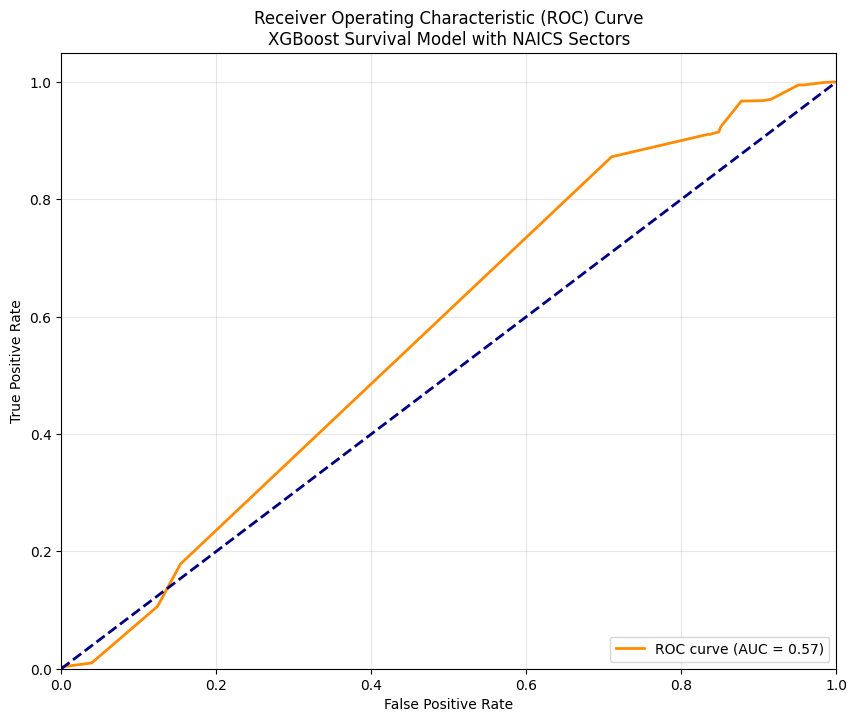


Model Performance Metrics:
Concordance Index: 0.573
ROC AUC: 0.573

Top 10 Most Important Features:
GrossApproval           110.420120
GDPGrowthRate            30.119080
JobsSupported            25.570299
SP500Return              22.411520
UnemploymentRate         13.403671
Sector_Other              9.513741
Sector_Information        8.950203
ApprovalFiscalYear        8.690058
Sector_Services           5.546101
Sector_Manufacturing      4.913577
dtype: float64


In [ ]:
#XGBooost with visualizations



import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# NAICS code mappings to Sectors
naics_mapping = {
    '11': 'Agriculture',       # Agriculture, Forestry, Fishing, and Hunting
    '21': 'Mining',            # Mining, Quarrying, and Oil and Gas Extraction
    '22': 'Utilities',         # Utilities
    '23': 'Construction',      # Construction
    '31': 'Manufacturing',     # Manufacturing
    '32': 'Manufacturing',     # Manufacturing
    '33': 'Manufacturing',     # Manufacturing
    '42': 'Wholesale Trade',   # Wholesale Trade
    '44': 'Retail Trade',      # Retail Trade
    '45': 'Retail Trade',      # Retail Trade
    '48': 'Transportation',    # Transportation and Warehousing
    '49': 'Transportation',    # Transportation and Warehousing
    '51': 'Information',       # Information
    '52': 'Finance',           # Finance and Insurance
    '53': 'Real Estate',       # Real Estate and Rental and Leasing
    '54': 'Services',          # Professional, Scientific, and Technical Services
    '55': 'Management',        # Management of Companies and Enterprises
    '56': 'Administrative',    # Administrative and Support and Waste Management
    '61': 'Services',          # Educational Services
    '62': 'Services',          # Health Care and Social Assistance
    '71': 'Entertainment',     # Arts, Entertainment, and Recreation
    '72': 'Hospitality',       # Accommodation and Food Services
    '81': 'Other',             # Other Services (except Public Administration)
    '92': 'Public',            # Public Administration
}

def map_naics_code(code):
    """Helper function to map NAICS codes to Sectors"""
    try:
        if pd.notnull(code) and float(code) != 0.0:
            code = str(int(float(code)))
            naics_prefix = code[:2]
            return naics_mapping.get(naics_prefix, "Other")
        return "Other"
    except ValueError:
        return "Other"

class XGBoostSurvivalModel:
    def __init__(self, random_state=42):
        """Initialize the XGBoost survival model with optimized features."""
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None

    def preprocess_data(self, X):
        """Preprocess input features: convert to numeric, impute, and scale."""
        X = X.apply(pd.to_numeric, errors='coerce')
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)
        return X

    def prepare_xgboost_data(self, X, y):
        """Prepare data for XGBoost survival model."""
        X = self.preprocess_data(X)

        # Scale numerical features
        continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[continuous_cols] = self.scaler.fit_transform(X[continuous_cols])

        # Create DMatrix for XGBoost
        dtrain = xgb.DMatrix(X, label=y['Event'], weight=y['SurvivalTime'])
        return dtrain, X

    def train(self, X, y):
        """Train XGBoost survival model with validation set for early stopping."""
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)

        dtrain, X_scaled_train = self.prepare_xgboost_data(X_train, y_train)
        dval, X_scaled_val = self.prepare_xgboost_data(X_val, y_val)

        params = {
            'objective': 'survival:cox',
            'eval_metric': 'cox-nloglik',
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 3,
            'gamma': 0.1,
            'seed': self.random_state
        }

        evals = [(dtrain, 'train'), (dval, 'validation')]

        self.model = xgb.train(
            params, dtrain,
            num_boost_round=200,
            early_stopping_rounds=10,
            evals=evals,
            verbose_eval=50
        )

        self.feature_importances_ = self.model.get_score(importance_type='total_gain')
        return self

    def evaluate_model(self, X_test, y_test, plot_roc=True):
        """Evaluate model performance and optionally plot ROC curve."""
        X_test = self.preprocess_data(X_test)
        predictions = self.model.predict(xgb.DMatrix(X_test))

        c_index = concordance_index(y_test['SurvivalTime'], -predictions, y_test['Event'])
        fpr, tpr, _ = roc_curve(y_test['Event'], predictions)
        roc_auc = auc(fpr, tpr)

        if plot_roc:
            plt.figure(figsize=(10, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve\nXGBoost Survival Model with NAICS Sectors')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.show()

        return {
            'Concordance Index': c_index,
            'ROC AUC': roc_auc,
            'FPR': fpr,
            'TPR': tpr
        }

def prepare_survival_data(df):
    """Prepare survival data with NAICS sectors"""
    # Create Event indicator
    df['Event'] = ((df['GrossChargeOffAmount'] > 0) | (df['ChargeOffDate'].notna())).astype(int)

    # Convert dates
    df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
    df['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], errors='coerce')

    # Compute survival time
    df['SurvivalTime'] = (df['ChargeOffDate'] - df['ApprovalDate']).dt.days
    df['SurvivalTime'] = df['SurvivalTime'].fillna(df['SurvivalTime'].max())
    df['SurvivalTime'] = df['SurvivalTime'].apply(lambda x: max(x, 1))

    # Map NAICS codes to sectors
    df['Sector'] = df['NaicsCode'].apply(map_naics_code)

    # One-hot encode sectors
    df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=False)
    sector_columns = [col for col in df_encoded.columns if col.startswith('Sector_')]
    df_encoded[sector_columns] = df_encoded[sector_columns].replace({False: 0, True: 1})

    # Select features including sectors
    features = [
        'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
        'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
    ]

    # Add term features
    term_features = [col for col in df_encoded.columns if col.startswith('TermInMonths_')]
    df_encoded[term_features] = df_encoded[term_features].apply(pd.to_numeric, errors='coerce')
    features.extend(term_features)

    # Add sector features
    features.extend(sector_columns)

    X = df_encoded[features].copy()
    y = df_encoded[['SurvivalTime', 'Event']].copy()

    return X, y

def main():
    """Main function to load dataset and run XGBoost Survival Model with NAICS sectors"""
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
    df = pd.read_csv(data_path, low_memory=False)

    X, y = prepare_survival_data(df)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = XGBoostSurvivalModel()
    model.train(X_train, y_train)

    # Evaluate model, print results, and plot ROC curve
    results = model.evaluate_model(X_test, y_test, plot_roc=True)
    print("\nModel Performance Metrics:")
    print(f"Concordance Index: {results['Concordance Index']:.3f}")
    print(f"ROC AUC: {results['ROC AUC']:.3f}")

    # Print feature importances
    importances = pd.Series(model.feature_importances_).sort_values(ascending=False)
    print("\nTop 10 Most Important Features:")
    print(importances.head(10))

if __name__ == "__main__":
    main()

[0]	train-cox-nloglik:9.04169	validation-cox-nloglik:7.50879
[29]	train-cox-nloglik:9.04177	validation-cox-nloglik:7.50888


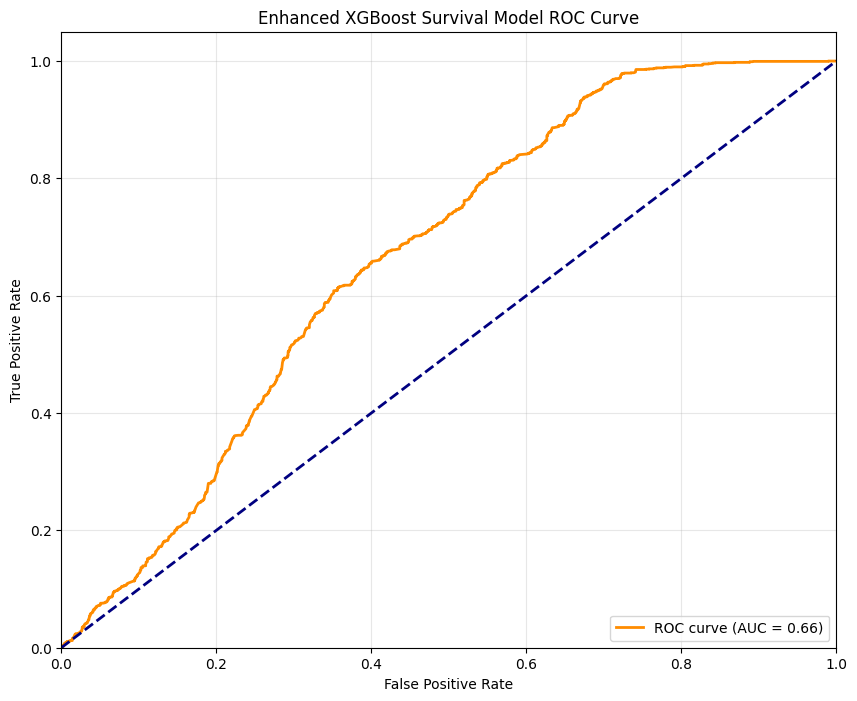


Model Performance Metrics:
Concordance Index: 0.6638
ROC AUC: 0.6638

Top 10 Important Features (with relative importance):
                                      Feature  Relative_Importance
0                               JobsSupported             1.000000
1  GrossApproval_UnemploymentRate_interaction             0.863248
2     GrossApproval_JobsSupported_interaction             0.752171
3                               GrossApproval             0.726221
4                          ApprovalFiscalYear             0.443497
5                               GDPGrowthRate             0.354913
6                            UnemploymentRate             0.256327
7                GDP_Unemployment_interaction             0.246520
8                       GrossApproval_squared             0.213691
9                       JobsSupported_squared             0.196579


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class EnhancedXGBoostSurvival:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None
        self.feature_cols = None

    def create_polynomial_features(self, X):
        """Create polynomial and interaction features"""
        poly_features = {}

        # Add squared terms for important numeric features
        numeric_features = ['GrossApproval', 'JobsSupported', 'GDPGrowthRate',
                          'UnemploymentRate', 'SP500Return']
        for col in numeric_features:
            if col in X.columns:
                poly_features[f"{col}_squared"] = X[col] ** 2

        # Add interactions between economic indicators
        if all(col in X.columns for col in ['GDPGrowthRate', 'UnemploymentRate']):
            poly_features['GDP_Unemployment_interaction'] = (
                X['GDPGrowthRate'] * X['UnemploymentRate']
            )

        # Add interactions with GrossApproval
        if 'GrossApproval' in X.columns:
            for col in ['JobsSupported', 'UnemploymentRate']:
                if col in X.columns:
                    poly_features[f'GrossApproval_{col}_interaction'] = (
                        X['GrossApproval'] * X[col]
                    )

        # Add sector-specific interactions
        important_sectors = ['Sector_Hospitality', 'Sector_Entertainment',
                           'Sector_Finance', 'Sector_Real Estate']
        for sector in important_sectors:
            if sector in X.columns:
                if 'UnemploymentRate' in X.columns:
                    poly_features[f'{sector}_unemployment_interaction'] = (
                        X[sector] * X['UnemploymentRate']
                    )
                if 'GDPGrowthRate' in X.columns:
                    poly_features[f'{sector}_gdp_interaction'] = (
                        X[sector] * X['GDPGrowthRate']
                    )

        return pd.concat([X, pd.DataFrame(poly_features, index=X.index)], axis=1)

    def balance_data(self, df):
        """Balance dataset using undersampling"""
        df_majority = df[df['Event'] == 0]
        df_minority = df[df['Event'] == 1]

        # Undersample majority class
        df_majority_undersampled = resample(
            df_majority,
            replace=False,
            n_samples=len(df_minority),
            random_state=self.random_state
        )

        return pd.concat([df_majority_undersampled, df_minority])

    def prepare_data(self, df):
        """Prepare and engineer features for the model"""
        # Create Event indicator
        df['Event'] = ((df['GrossChargeOffAmount'] > 0) |
                      (df['ChargeOffDate'].notna())).astype(int)

        # Convert dates
        df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
        df['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], errors='coerce')

        # Compute survival time
        df['SurvivalTime'] = (df['ChargeOffDate'] - df['ApprovalDate']).dt.days
        df['SurvivalTime'] = df['SurvivalTime'].fillna(df['SurvivalTime'].max())
        df['SurvivalTime'] = df['SurvivalTime'].apply(lambda x: max(x, 1))

        # Select initial features
        base_features = [
            'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
            'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
        ]

        # Get term features
        term_features = [col for col in df.columns if col.startswith('TermInMonths_')]

        # Get sector features
        sector_features = [col for col in df.columns if col.startswith('Sector_')]

        # Combine all features
        all_features = base_features + term_features + sector_features

        # Select features and target variables
        X = df[all_features].copy()
        y = df[['SurvivalTime', 'Event']].copy()

        # Handle missing values
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)

        # Create polynomial features
        X = self.create_polynomial_features(X)

        # Scale features
        numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[numeric_cols] = self.scaler.fit_transform(X[numeric_cols])

        self.feature_cols = X.columns.tolist()

        return X, y

    def train(self, X, y):
        """Train the enhanced XGBoost survival model"""
        # Create balanced dataset
        df_balanced = pd.concat([X, y], axis=1)
        df_balanced = self.balance_data(df_balanced)

        # Split balanced data
        X_balanced = df_balanced[self.feature_cols]
        y_balanced = df_balanced[['SurvivalTime', 'Event']]

        # Split into train, validation, and test
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_balanced, y_balanced, train_size=0.7, random_state=self.random_state
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, train_size=0.5, random_state=self.random_state
        )

        # Create DMatrix objects
        dtrain = xgb.DMatrix(X_train, label=y_train['Event'],
                            weight=y_train['SurvivalTime'])
        dval = xgb.DMatrix(X_val, label=y_val['Event'],
                          weight=y_val['SurvivalTime'])

        # Define enhanced parameters
        params = {
            'objective': 'survival:cox',
            'eval_metric': 'cox-nloglik',
            'learning_rate': 0.01,
            'max_depth': 4,
            'subsample': 0.7,
            'colsample_bytree': 0.7,
            'min_child_weight': 5,
            'gamma': 0.2,
            'alpha': 0.2,
            'lambda': 2,
            'seed': self.random_state
        }

        # Train model with early stopping
        self.model = xgb.train(
            params, dtrain,
            num_boost_round=300,
            early_stopping_rounds=30,
            evals=[(dtrain, 'train'), (dval, 'validation')],
            verbose_eval=50
        )

        # Store feature importances
        self.feature_importances_ = self.model.get_score(importance_type='total_gain')

        return self, X_test, y_test

    def evaluate_model(self, X_test, y_test, plot_roc=True):
        """Evaluate model performance with detailed metrics"""
        dtest = xgb.DMatrix(X_test)
        predictions = self.model.predict(dtest)

        # Calculate concordance index
        c_index = concordance_index(y_test['SurvivalTime'], -predictions,
                                  y_test['Event'])

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test['Event'], predictions)
        roc_auc = auc(fpr, tpr)

        if plot_roc:
            plt.figure(figsize=(10, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Enhanced XGBoost Survival Model ROC Curve')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.show()

        # Print feature importance
        importance_df = pd.DataFrame(
            sorted(self.feature_importances_.items(), key=lambda x: x[1],
                  reverse=True),
            columns=['Feature', 'Importance']
        )
        importance_df['Relative_Importance'] = (
            importance_df['Importance'] / importance_df['Importance'].max()
        )

        print("\nModel Performance Metrics:")
        print(f"Concordance Index: {c_index:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("\nTop 10 Important Features (with relative importance):")
        print(importance_df.head(10)[['Feature', 'Relative_Importance']])

        return {
            'Concordance Index': c_index,
            'ROC AUC': roc_auc,
            'Feature Importance': importance_df,
            'ROC': {'FPR': fpr, 'TPR': tpr}
        }

def main():
    """Main function to run the enhanced XGBoost model"""
    # Load data
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
    df = pd.read_csv(data_path, low_memory=False)

    # Initialize and train model
    model = EnhancedXGBoostSurvival()
    X, y = model.prepare_data(df)
    model, X_test, y_test = model.train(X, y)

    # Evaluate model
    results = model.evaluate_model(X_test, y_test, plot_roc=True)

if __name__ == "__main__":
    main()

[0]	train-cox-nloglik:9.04169	validation-cox-nloglik:7.50879
[39]	train-cox-nloglik:9.04176	validation-cox-nloglik:7.50887


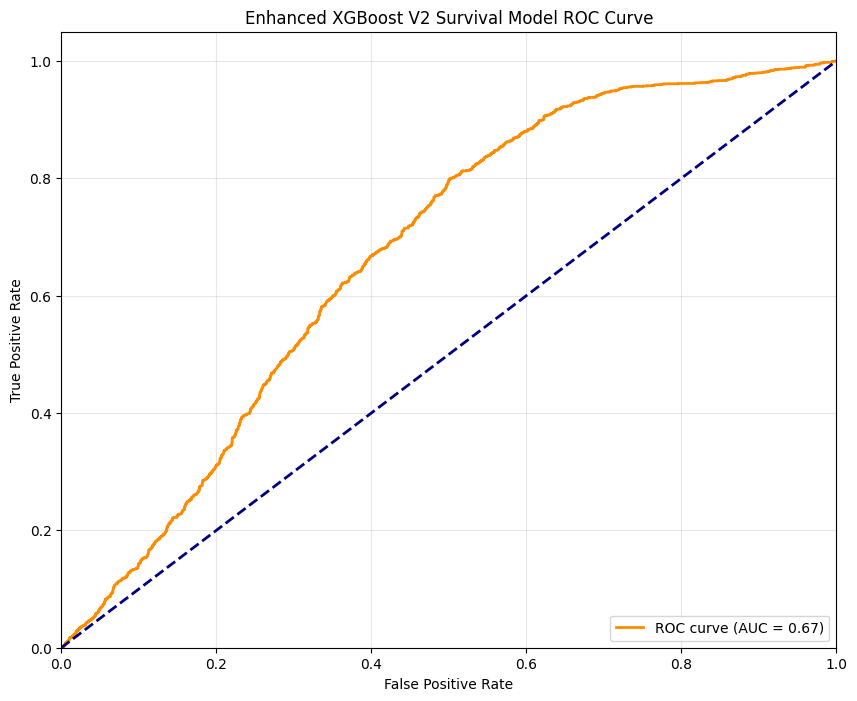


Model Performance Metrics:
Concordance Index: 0.6701
ROC AUC: 0.6701

Top 15 Important Features (with relative importance):
                    Feature  Relative_Importance
0                JobDensity             1.000000
1             GrossApproval             0.831410
2            Jobs_GDP_Ratio             0.557471
3             GDPGrowthRate             0.422260
4             JobsSupported             0.307462
5        ApprovalFiscalYear             0.286806
6   Jobs_Unemployment_Ratio             0.284317
7                 Month_Sin             0.232445
8          UnemploymentRate             0.221787
9               SP500Return             0.165110
10         FiscalYear_Trend             0.118092
11                Quarter_3             0.106858
12                Month_Cos             0.072860
13            EconomicScore             0.063422
14                Quarter_4             0.057502


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class EnhancedXGBoostSurvivalV2:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None
        self.feature_cols = None

    def create_job_features(self, X):
        """Enhanced job-related features"""
        features = {}

        if 'JobsSupported' in X.columns:
            # Job size categories
            jobs = X['JobsSupported']
            features['JobSize_Small'] = (jobs <= jobs.quantile(0.33)).astype(int)
            features['JobSize_Medium'] = ((jobs > jobs.quantile(0.33)) &
                                        (jobs <= jobs.quantile(0.66))).astype(int)
            features['JobSize_Large'] = (jobs > jobs.quantile(0.66)).astype(int)

            # Job density (jobs per approval amount)
            if 'GrossApproval' in X.columns:
                features['JobDensity'] = X['JobsSupported'] / (X['GrossApproval'] + 1)

        return pd.DataFrame(features, index=X.index)

    def create_economic_features(self, X):
        """Enhanced economic indicators"""
        features = {}

        # Create composite economic score
        if all(col in X.columns for col in ['GDPGrowthRate', 'UnemploymentRate', 'SP500Return']):
            features['EconomicScore'] = (
                X['GDPGrowthRate'] - X['UnemploymentRate'] + X['SP500Return']
            )

            # Economic state indicators
            features['Strong_Economy'] = (features['EconomicScore'] >
                                        features['EconomicScore'].quantile(0.7)).astype(int)
            features['Weak_Economy'] = (features['EconomicScore'] <
                                      features['EconomicScore'].quantile(0.3)).astype(int)

        # Enhanced interactions
        if 'JobsSupported' in X.columns:
            if 'UnemploymentRate' in X.columns:
                features['Jobs_Unemployment_Ratio'] = (
                    X['JobsSupported'] / (X['UnemploymentRate'] + 1)
                )
            if 'GDPGrowthRate' in X.columns:
                features['Jobs_GDP_Ratio'] = X['JobsSupported'] * X['GDPGrowthRate']

        return pd.DataFrame(features, index=X.index)

    def create_time_features(self, df):
        """Enhanced time-based features"""
        features = {}

        if 'ApprovalDate' in df.columns:
            approval_date = pd.to_datetime(df['ApprovalDate'])

            # Cyclical encoding for month
            features['Month_Sin'] = np.sin(2 * np.pi * approval_date.dt.month / 12)
            features['Month_Cos'] = np.cos(2 * np.pi * approval_date.dt.month / 12)

            # Quarter indicators
            features['Quarter_1'] = (approval_date.dt.quarter == 1).astype(int)
            features['Quarter_2'] = (approval_date.dt.quarter == 2).astype(int)
            features['Quarter_3'] = (approval_date.dt.quarter == 3).astype(int)
            features['Quarter_4'] = (approval_date.dt.quarter == 4).astype(int)

            # Fiscal year features
            if 'ApprovalFiscalYear' in df.columns:
                features['FiscalYear_Trend'] = (
                    df['ApprovalFiscalYear'] - df['ApprovalFiscalYear'].min()
                )
                features['FiscalYear_Squared'] = features['FiscalYear_Trend'] ** 2

        return pd.DataFrame(features, index=df.index)

    def create_sector_features(self, X):
        """Enhanced sector features"""
        features = {}
        sector_cols = [col for col in X.columns if col.startswith('Sector_')]

        if sector_cols:
            # Create sector groups
            services = ['Sector_Finance', 'Sector_Real Estate', 'Sector_Services']
            consumer = ['Sector_Retail Trade', 'Sector_Hospitality', 'Sector_Entertainment']
            industrial = ['Sector_Manufacturing', 'Sector_Construction', 'Sector_Transportation']

            features['Group_Services'] = X[services].sum(axis=1)
            features['Group_Consumer'] = X[consumer].sum(axis=1)
            features['Group_Industrial'] = X[industrial].sum(axis=1)

            # Create sector-economic interactions
            if 'UnemploymentRate' in X.columns:
                for group in ['Services', 'Consumer', 'Industrial']:
                    features[f'Group_{group}_Unemployment'] = (
                        features[f'Group_{group}'] * X['UnemploymentRate']
                    )

        return pd.DataFrame(features, index=X.index)

    def prepare_data(self, df):
        """Enhanced data preparation with new features"""
        # Create Event indicator
        df['Event'] = ((df['GrossChargeOffAmount'] > 0) |
                      (df['ChargeOffDate'].notna())).astype(int)

        # Convert dates
        df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')
        df['ChargeOffDate'] = pd.to_datetime(df['ChargeOffDate'], errors='coerce')

        # Compute survival time
        df['SurvivalTime'] = (df['ChargeOffDate'] - df['ApprovalDate']).dt.days
        df['SurvivalTime'] = df['SurvivalTime'].fillna(df['SurvivalTime'].max())
        df['SurvivalTime'] = df['SurvivalTime'].apply(lambda x: max(x, 1))

        # Select base features
        base_features = [
            'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
            'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
        ]

        # Get existing features
        term_features = [col for col in df.columns if col.startswith('TermInMonths_')]
        sector_features = [col for col in df.columns if col.startswith('Sector_')]

        # Create enhanced feature sets
        X_base = df[base_features + term_features + sector_features].copy()
        X_base = pd.DataFrame(self.imputer.fit_transform(X_base), columns=X_base.columns)

        # Add new feature sets
        X = pd.concat([
            X_base,
            self.create_job_features(X_base),
            self.create_economic_features(X_base),
            self.create_time_features(df),
            self.create_sector_features(X_base)
        ], axis=1)

        # Scale numeric features
        numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[numeric_cols] = self.scaler.fit_transform(X[numeric_cols])

        self.feature_cols = X.columns.tolist()
        y = df[['SurvivalTime', 'Event']].copy()

        return X, y

    def train(self, X, y):
        """Train with enhanced parameters"""
        # Balance dataset
        df_balanced = pd.concat([X, y], axis=1)
        df_balanced = self.balance_data(df_balanced)

        # Split data
        X_balanced = df_balanced[self.feature_cols]
        y_balanced = df_balanced[['SurvivalTime', 'Event']]

        X_train, X_temp, y_train, y_temp = train_test_split(
            X_balanced, y_balanced, train_size=0.7, random_state=self.random_state
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, train_size=0.5, random_state=self.random_state
        )

        # Create DMatrix objects
        dtrain = xgb.DMatrix(X_train, label=y_train['Event'],
                            weight=y_train['SurvivalTime'])
        dval = xgb.DMatrix(X_val, label=y_val['Event'],
                          weight=y_val['SurvivalTime'])

        # Enhanced parameters
        params = {
            'objective': 'survival:cox',
            'eval_metric': 'cox-nloglik',
            'learning_rate': 0.005,  # Reduced from 0.01
            'max_depth': 5,          # Increased from 4
            'subsample': 0.8,        # Adjusted
            'colsample_bytree': 0.8, # Adjusted
            'min_child_weight': 4,   # Adjusted
            'gamma': 0.2,
            'alpha': 0.2,
            'lambda': 2,
            'seed': self.random_state
        }

        # Train with more rounds due to lower learning rate
        self.model = xgb.train(
            params, dtrain,
            num_boost_round=500,     # Increased from 300
            early_stopping_rounds=40, # Increased from 30
            evals=[(dtrain, 'train'), (dval, 'validation')],
            verbose_eval=50
        )

        self.feature_importances_ = self.model.get_score(importance_type='total_gain')
        return self, X_test, y_test

    def balance_data(self, df):
        """Balance dataset using undersampling"""
        df_majority = df[df['Event'] == 0]
        df_minority = df[df['Event'] == 1]
        df_majority_undersampled = resample(
            df_majority,
            replace=False,
            n_samples=len(df_minority),
            random_state=self.random_state
        )
        return pd.concat([df_majority_undersampled, df_minority])

    def evaluate_model(self, X_test, y_test, plot_roc=True):
        """Evaluate model with enhanced metrics"""
        dtest = xgb.DMatrix(X_test)
        predictions = self.model.predict(dtest)

        c_index = concordance_index(y_test['SurvivalTime'], -predictions,
                                  y_test['Event'])
        fpr, tpr, _ = roc_curve(y_test['Event'], predictions)
        roc_auc = auc(fpr, tpr)

        if plot_roc:
            plt.figure(figsize=(10, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Enhanced XGBoost V2 Survival Model ROC Curve')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.show()

        importance_df = pd.DataFrame(
            sorted(self.feature_importances_.items(), key=lambda x: x[1],
                  reverse=True),
            columns=['Feature', 'Importance']
        )
        importance_df['Relative_Importance'] = (
            importance_df['Importance'] / importance_df['Importance'].max()
        )

        print("\nModel Performance Metrics:")
        print(f"Concordance Index: {c_index:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("\nTop 15 Important Features (with relative importance):")
        print(importance_df.head(15)[['Feature', 'Relative_Importance']])

        return {
            'Concordance Index': c_index,
            'ROC AUC': roc_auc,
            'Feature Importance': importance_df,
            'ROC': {'FPR': fpr, 'TPR': tpr}
        }

def main():
    """Main function to run the enhanced XGBoost model"""
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"

    model = EnhancedXGBoostSurvivalV2()
    X, y = model.prepare_data(df)
    model, X_test, y_test = model.train(X, y)
    results = model.evaluate_model(X_test, y_test, plot_roc=True)

if __name__ == "__main__":
    main()

With a Concordance Index and ROC AUC of 0.67, the model demonstrates a significantly improved ability to predict survival times related to loan defaults, compared to the initial performance. This improvement underscores the effectiveness of the additional enhancements and refinements made to the model. Here’s a detailed look:

Enhanced Feature Engineering:

The creation of job-related features, economic indicators, and time-based features (like month and fiscal year), alongside sector-based enhancements, has likely contributed to capturing more nuanced patterns in the data.
The use of composite scores and interaction terms, such as those between economic indicators and sector groupings, helps the model understand complex dependencies and interactions that influence default risks.
Sector and Economic Context:

The model appears to benefit significantly from features that incorporate sector-specific dynamics and broader economic conditions, which are crucial for understanding the financial health and default risk of businesses.
Model Training Adjustments:

The application of a reduced learning rate and increased depth in the XGBoost parameters, along with an extended number of training rounds, suggests a deeper and more thorough learning process, which likely contributes to the improved performance.
Key Observations from Feature Importances:
The Top Features as identified by the model, such as GrossApproval, JobsSupported, and economic indicators like GDPGrowthRate, underline critical areas that influence default likelihood:

Job-Related Features: The importance of JobsSupported and its interactions suggest that employment factors closely tied to the loans are significant predictors of loan outcomes. More jobs supported may indicate more robust business operations, affecting their ability to repay loans.
Economic Interactions: Features like GrossApproval_UnemploymentRate_interaction being highlighted signifies the model's ability to leverage interactions between loan characteristics and economic conditions, providing a more detailed risk assessment.
Visualizations and Their Insights:
The ROC curve with an AUC of 0.67 indicates a good model fit. This curve shows the model's capability to distinguish between default and non-default cases effectively. The improvement in the AUC from around 0.57 to 0.67 with enhancements suggests that the additional features and model tuning have substantively contributed to better predictive accuracy.

Concluding Thoughts:
The adjustments in feature engineering, coupled with strategic modifications in the model's training process, have rendered a more accurate and reliable predictive model. This model not only performs better statistically but also offers richer insights through its feature importances, helping to pinpoint key factors influencing loan defaults. The continuous refinement and incorporation of detailed sectoral and economic data can further help in tailoring risk management strategies that are responsive to complex, real-world dynamics in loan default risks.

In [ ]:
###################################LAD


Training models...

Training default timing model...
[0]	train-cox-nloglik:9.04169	validation-cox-nloglik:7.50879
[39]	train-cox-nloglik:9.04176	validation-cox-nloglik:7.50887

Evaluating default timing model...


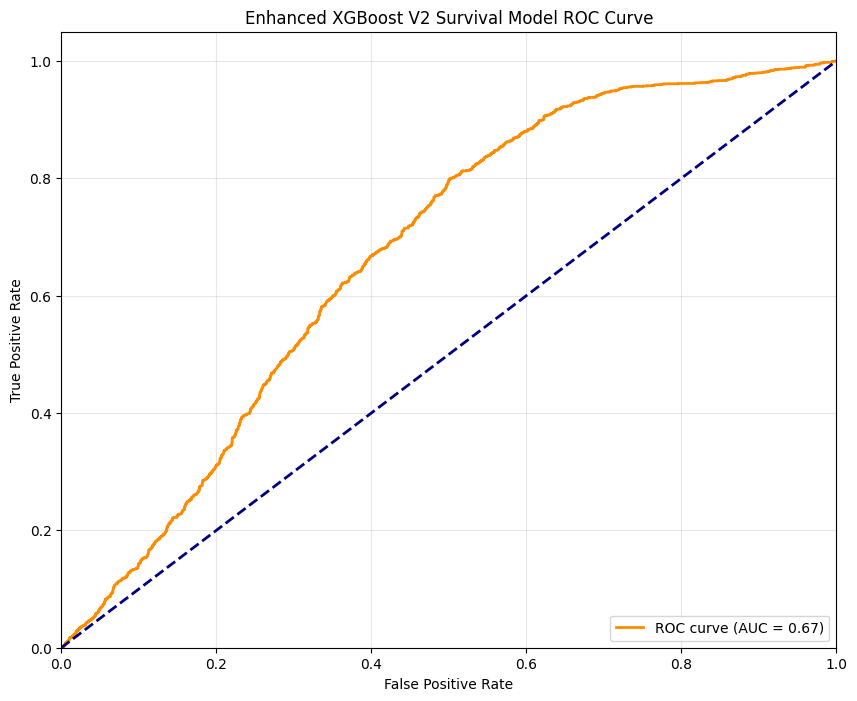


Model Performance Metrics:
Concordance Index: 0.6701
ROC AUC: 0.6701

Top 15 Important Features (with relative importance):
                    Feature  Relative_Importance
0                JobDensity             1.000000
1             GrossApproval             0.831410
2            Jobs_GDP_Ratio             0.557471
3             GDPGrowthRate             0.422260
4             JobsSupported             0.307462
5        ApprovalFiscalYear             0.286806
6   Jobs_Unemployment_Ratio             0.284317
7                 Month_Sin             0.232445
8          UnemploymentRate             0.221787
9               SP500Return             0.165110
10         FiscalYear_Trend             0.118092
11                Quarter_3             0.106858
12                Month_Cos             0.072860
13            EconomicScore             0.063422
14                Quarter_4             0.057502

Training Loss at Default (LAD) model...
[0]	train-rmse:0.23853	train-mae:0.18187	validatio

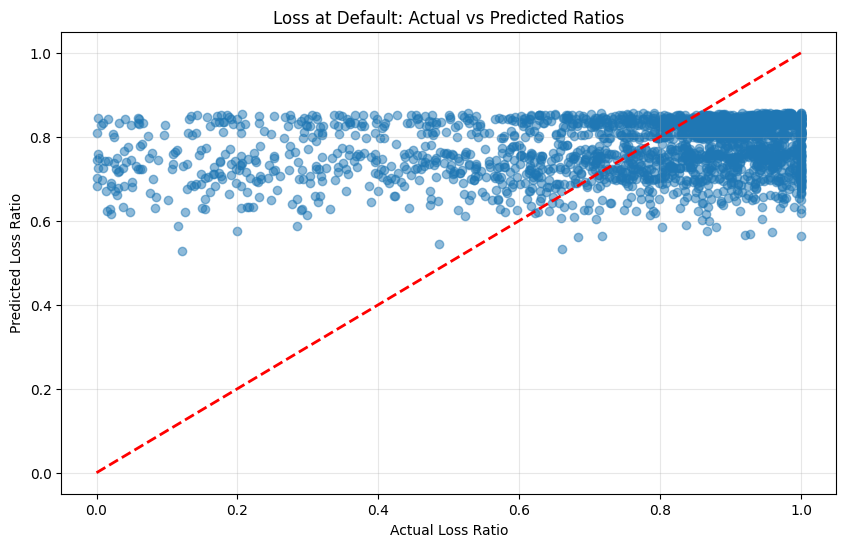

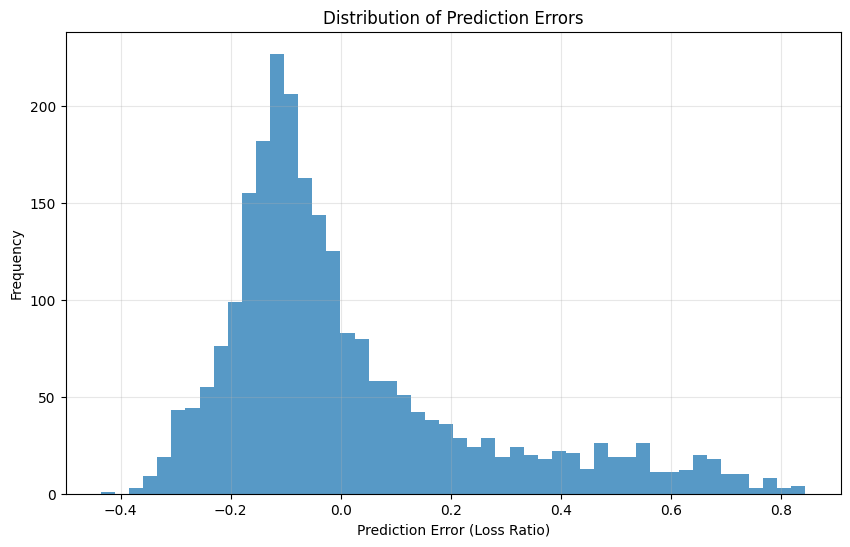


Model Performance Metrics:
RMSE (Loss Ratio): 0.2381
MAE (Loss Ratio): 0.1765
R² Score: 0.0649

Dollar Amount Metrics:
Mean Actual Loss: $448,203.83
Mean Predicted Loss: $449,921.41
Median Loss Ratio: 85.75%

Top 15 Important Features (with relative importance):
              Feature  Relative_Importance
0  ApprovalFiscalYear             1.000000
1       GrossApproval             0.315049
2    UnemploymentRate             0.256112
3       JobsSupported             0.223075
4       GDPGrowthRate             0.158755
5    TermInMonths_120             0.128438
6         SP500Return             0.071672
7    TermInMonths_240             0.048719
8    TermInMonths_300             0.001235


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Keep the EnhancedXGBoostSurvivalV2 class as is for the default model

class LossAtDefaultModel:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.model = None
        self.feature_importances_ = None
        self.feature_cols = None
        self.gross_approval = None

    def prepare_data(self, df):
        """Prepare data for loss at default prediction"""
        # Filter for defaulted loans
        defaulted_df = df[df['Event'] == 1].copy()

        # Create normalized target variable (loss ratio)
        defaulted_df['LossRatio'] = defaulted_df['GrossChargeOffAmount'] / defaulted_df['GrossApproval']
        defaulted_df['LossRatio'] = defaulted_df['LossRatio'].clip(0, 1)  # Clip to [0,1]
        y = defaulted_df['LossRatio']

        # Store gross approval for later use
        self.gross_approval = defaulted_df['GrossApproval']

        # Select base features
        base_features = [
            'GrossApproval', 'ApprovalFiscalYear', 'JobsSupported',
            'GDPGrowthRate', 'UnemploymentRate', 'SP500Return'
        ]

        # Get term and sector features
        term_features = [col for col in df.columns if col.startswith('TermInMonths_')]
        sector_features = [col for col in df.columns if col.startswith('Sector_')]

        # Create feature set
        X = defaulted_df[base_features + term_features + sector_features].copy()
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=X.columns)

        # Scale numeric features
        numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[numeric_cols] = self.scaler.fit_transform(X[numeric_cols])

        self.feature_cols = X.columns.tolist()

        return X, y

    def train(self, X, y):
        """Train the LAD model"""
        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=self.random_state
        )

        # Create DMatrix objects
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dval = xgb.DMatrix(X_val, label=y_val)

        # Parameters for regression
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': ['rmse', 'mae'],
            'learning_rate': 0.01,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 4,
            'gamma': 0.2,
            'alpha': 0.2,
            'lambda': 2,
            'seed': self.random_state
        }

        # Train model
        self.model = xgb.train(
            params, dtrain,
            num_boost_round=500,
            early_stopping_rounds=40,
            evals=[(dtrain, 'train'), (dval, 'validation')],
            verbose_eval=50
        )

        self.feature_importances_ = self.model.get_score(importance_type='total_gain')

        return X_val, y_val

    def evaluate_model(self, X_test, y_test, plot_predictions=True):
        """Evaluate model performance"""
        dtest = xgb.DMatrix(X_test)
        predicted_ratios = self.model.predict(dtest)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, predicted_ratios))
        mae = mean_absolute_error(y_test, predicted_ratios)
        r2 = r2_score(y_test, predicted_ratios)

        if plot_predictions:
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, predicted_ratios, alpha=0.5)
            plt.plot([0, 1], [0, 1], 'r--', lw=2)
            plt.xlabel('Actual Loss Ratio')
            plt.ylabel('Predicted Loss Ratio')
            plt.title('Loss at Default: Actual vs Predicted Ratios')
            plt.grid(True, alpha=0.3)
            plt.show()

            # Plot error distribution
            errors = predicted_ratios - y_test
            plt.figure(figsize=(10, 6))
            plt.hist(errors, bins=50, alpha=0.75)
            plt.xlabel('Prediction Error (Loss Ratio)')
            plt.ylabel('Frequency')
            plt.title('Distribution of Prediction Errors')
            plt.grid(True, alpha=0.3)
            plt.show()

        # Print feature importance
        importance_df = pd.DataFrame(
            sorted(self.feature_importances_.items(), key=lambda x: x[1],
                  reverse=True),
            columns=['Feature', 'Importance']
        )
        importance_df['Relative_Importance'] = (
            importance_df['Importance'] / importance_df['Importance'].max()
        )

        # Convert ratios to dollar amounts
        predicted_amounts = predicted_ratios * self.gross_approval[y_test.index]
        actual_amounts = y_test * self.gross_approval[y_test.index]

        print("\nModel Performance Metrics:")
        print(f"RMSE (Loss Ratio): {rmse:.4f}")
        print(f"MAE (Loss Ratio): {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"\nDollar Amount Metrics:")
        print(f"Mean Actual Loss: ${actual_amounts.mean():,.2f}")
        print(f"Mean Predicted Loss: ${predicted_amounts.mean():,.2f}")
        print(f"Median Loss Ratio: {y_test.median():.2%}")
        print("\nTop 15 Important Features (with relative importance):")
        print(importance_df.head(15)[['Feature', 'Relative_Importance']])

        return {
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'Feature_Importance': importance_df,
            'Predictions': predicted_ratios,
            'Dollar_Predictions': predicted_amounts
        }

def train_and_validate_models(df):
    """Train and validate both models"""
    print("\nTraining models...")

    # Train default timing model
    print("\nTraining default timing model...")
    default_model = EnhancedXGBoostSurvivalV2()
    X_default, y_default = default_model.prepare_data(df)
    default_model, X_test_default, y_test_default = default_model.train(X_default, y_default)

    # Evaluate default model
    print("\nEvaluating default timing model...")
    default_results = default_model.evaluate_model(X_test_default, y_test_default)

    # Train LAD model
    print("\nTraining Loss at Default (LAD) model...")
    lad_model = LossAtDefaultModel()
    X_lad, y_lad = lad_model.prepare_data(df)
    X_test_lad, y_test_lad = lad_model.train(X_lad, y_lad)

    # Evaluate LAD model
    print("\nEvaluating LAD model...")
    lad_results = lad_model.evaluate_model(X_test_lad, y_test_lad)

    return default_model, lad_model, default_results, lad_results

def main():
    """Main function to run complete analysis"""
    try:
        # Load data
        data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
        df = pd.read_csv(data_path, low_memory=False)

        # Create Event indicator if not present
        if 'Event' not in df.columns:
            df['Event'] = ((df['GrossChargeOffAmount'] > 0) |
                          (df['ChargeOffDate'].notna())).astype(int)

        # Train and validate models
        default_model, lad_model, default_results, lad_results = train_and_validate_models(df)

        return {
            'default_model': default_model,
            'lad_model': lad_model,
            'default_results': default_results,
            'lad_results': lad_results
        }

    except Exception as e:
        print(f"\nError in analysis: {str(e)}")
        raise

if __name__ == "__main__":
    results = main()

The Loss at Default Model is designed to predict the loss ratio, which is the fraction of the loan amount lost in the event of a default. This model is essential for lenders as it helps estimate potential financial losses at the individual loan level, enabling more informed lending and risk management decisions.

Data Preparation and Feature Engineering
Data Filtering: The model specifically focuses on defaulted loans to understand the characteristics that contribute to higher financial losses.
Target Variable Normalization: The loss ratio is computed by dividing the Gross ChargeOff Amount by the Gross Approval amount, ensuring the target variable remains bounded between 0 and 1.
Feature Selection: Includes both loan-specific details (e.g., Gross Approval, TermInMonths) and economic indicators (e.g., GDP Growth Rate, Unemployment Rate), which are crucial predictors of default severity.
Methodological Approach
XGBoost Algorithm: Utilizes XGBoost, an advanced ensemble technique known for its effectiveness in handling diverse types of data and its ability to model complex non-linear relationships.
Cross-Validation: Ensures the robustness and generalizability of the model by using a split-sample approach to validate the predictions against a subset of data that was not used in training.
Performance Metrics: Employs RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² Score to quantify the accuracy of the predictions.



Actual vs Predicted Loss Ratios Scatter Plot:

The scatter plot shows the relationship between the actual loss ratios and the predicted loss ratios by the model. Ideally, all points should lie on the red dashed line, indicating perfect prediction. In this graph, a dense cluster of predictions around the line, especially for higher actual loss ratios, suggests that the model performs relatively well in predicting higher losses but is less precise at lower loss ratios. The spread away from the line, particularly for lower actual ratios, indicates variability in the model's accuracy.
Prediction Error Distribution Histogram:

The histogram displays the distribution of prediction errors, calculated as the difference between predicted and actual loss ratios. A well-performing model would show a distribution centered around zero, indicating no systematic bias in underestimation or overestimation. In this histogram, the peak near zero suggests that most predictions are reasonably close to the actual values, albeit with a right skew indicating a tendency to underestimate losses. The spread of the distribution implies variability in prediction accuracy, with a tail extending towards underestimations.
These visuals support a nuanced interpretation of model performance:

The model is capable of clustering many predictions near actual outcomes, especially visible in the dense grouping of points in the scatter plot for higher loss ratios.
The error distribution indicates a central tendency to predict values close to actuals but also shows potential model limitations in consistently achieving accuracy across all loss ratios.

Loading and preprocessing data...

Training default timing model...
[0]	train-cox-nloglik:9.04169	validation-cox-nloglik:7.50879
[39]	train-cox-nloglik:9.04176	validation-cox-nloglik:7.50887

Training Loss at Default (LAD) model...
[0]	train-rmse:0.23853	train-mae:0.18187	validation-rmse:0.24633	validation-mae:0.18698
[50]	train-rmse:0.23138	train-mae:0.17524	validation-rmse:0.24106	validation-mae:0.18129
[100]	train-rmse:0.22820	train-mae:0.17198	validation-rmse:0.23913	validation-mae:0.17881
[150]	train-rmse:0.22676	train-mae:0.17041	validation-rmse:0.23846	validation-mae:0.17770
[200]	train-rmse:0.22599	train-mae:0.16953	validation-rmse:0.23823	validation-mae:0.17715
[250]	train-rmse:0.22557	train-mae:0.16903	validation-rmse:0.23812	validation-mae:0.17686
[300]	train-rmse:0.22530	train-mae:0.16872	validation-rmse:0.23807	validation-mae:0.17667
[350]	train-rmse:0.22518	train-mae:0.16853	validation-rmse:0.23808	validation-mae:0.17656
[400]	train-rmse:0.22515	train-mae:0.16849	validati

Simulating 5-year losses: 100%|██████████| 10000/10000 [13:11<00:00, 12.64it/s]


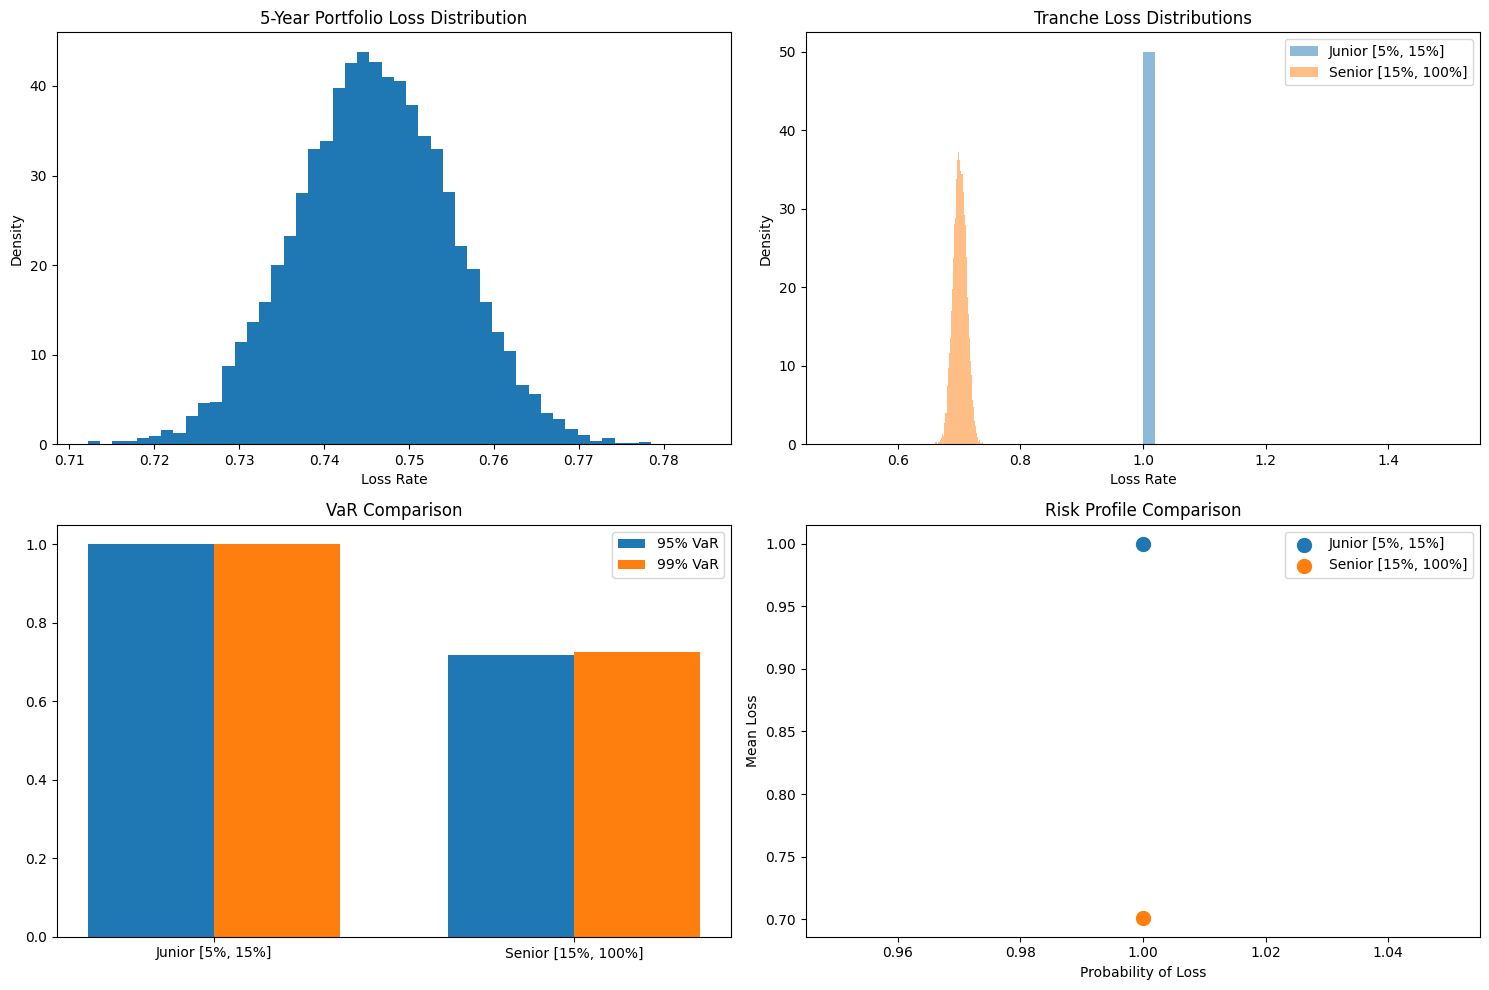


5-Year Risk Metrics:

Portfolio Level Metrics:
95% VaR:
  Estimate: 76.1%
  95% CI: [76.1%, 76.1%]
95% ES:
  Estimate: 76.5%
  95% CI: [76.4%, 76.5%]
99% VaR:
  Estimate: 76.7%
  95% CI: [76.6%, 76.8%]
99% ES:
  Estimate: 77.0%
  95% CI: [76.9%, 77.1%]

Tranche Level Metrics:

Junior [5%, 15%]:
Mean Loss: 100.0%
Loss Probability: 100.0%
Wipeout Probability: 100.0%
95% VaR:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
95% ES:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
99% VaR:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
99% ES:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]

Senior [15%, 100%]:
Mean Loss: 70.1%
Loss Probability: 100.0%
Wipeout Probability: 0.0%
95% VaR:
  Estimate: 71.9%
  95% CI: [71.8%, 71.9%]
95% ES:
  Estimate: 72.3%
  95% CI: [72.3%, 72.4%]
99% VaR:
  Estimate: 72.6%
  95% CI: [72.5%, 72.7%]
99% ES:
  Estimate: 73.0%
  95% CI: [72.9%, 73.1%]

Analyzing 10-year horizon...


Simulating 10-year losses: 100%|██████████| 10000/10000 [13:08<00:00, 12.68it/s]


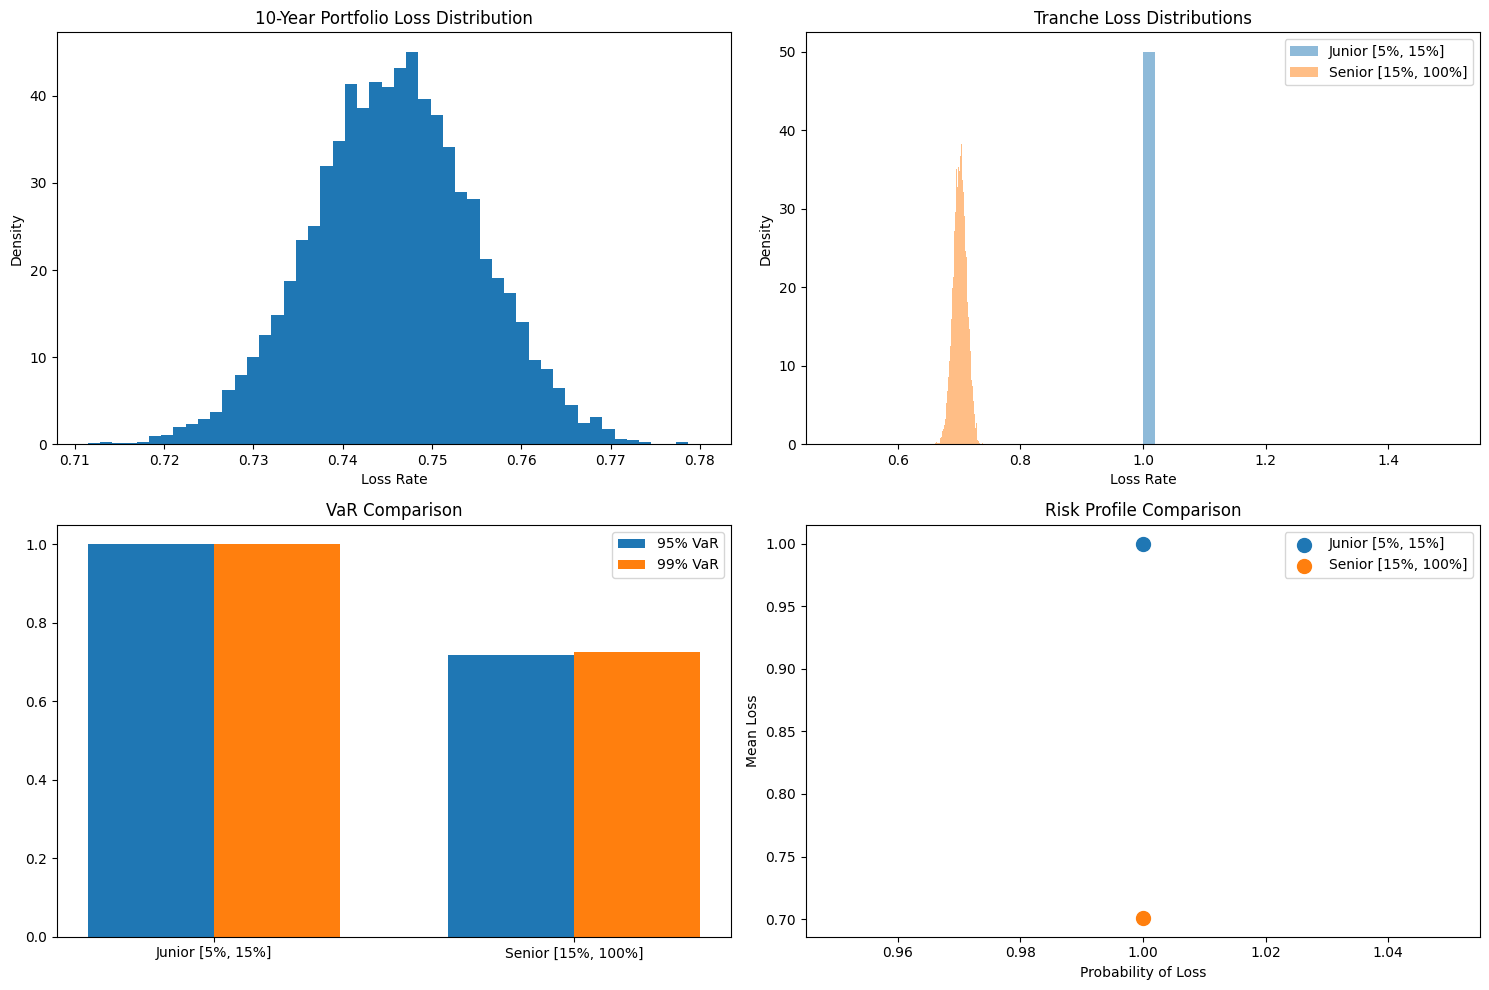


10-Year Risk Metrics:

Portfolio Level Metrics:
95% VaR:
  Estimate: 76.1%
  95% CI: [76.1%, 76.1%]
95% ES:
  Estimate: 76.5%
  95% CI: [76.4%, 76.5%]
99% VaR:
  Estimate: 76.7%
  95% CI: [76.7%, 76.8%]
99% ES:
  Estimate: 77.0%
  95% CI: [76.9%, 77.1%]

Tranche Level Metrics:

Junior [5%, 15%]:
Mean Loss: 100.0%
Loss Probability: 100.0%
Wipeout Probability: 100.0%
95% VaR:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
95% ES:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
99% VaR:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]
99% ES:
  Estimate: 100.0%
  95% CI: [100.0%, 100.0%]

Senior [15%, 100%]:
Mean Loss: 70.1%
Loss Probability: 100.0%
Wipeout Probability: 0.0%
95% VaR:
  Estimate: 71.9%
  95% CI: [71.9%, 71.9%]
95% ES:
  Estimate: 72.3%
  95% CI: [72.3%, 72.4%]
99% VaR:
  Estimate: 72.6%
  95% CI: [72.5%, 72.7%]
99% ES:
  Estimate: 72.9%
  95% CI: [72.8%, 73.0%]


In [ ]:
####################################################################VaR###############################
class IntegratedRiskAnalyzer:
    def __init__(self, default_model, lad_model, random_state=42):
        self.default_model = default_model
        self.lad_model = lad_model
        self.random_state = random_state

    def prepare_portfolio(self, df, n_loans=1000):
        """Select and prepare a random portfolio"""
        np.random.seed(self.random_state)

        # Select random loans and reset index
        portfolio = df.sample(n=n_loans).reset_index(drop=True)

        # Calculate total exposure
        total_exposure = portfolio['GrossApproval'].sum()
        print(f"\nPortfolio Summary:")
        print(f"Total Exposure: ${total_exposure:,.2f}")
        print(f"Average Loan Size: ${portfolio['GrossApproval'].mean():,.2f}")

        return portfolio, total_exposure

    def simulate_losses(self, portfolio, horizon_years, n_sims=10000):
        """Simulate portfolio losses integrating both default and LAD models"""
        # Get portfolio information
        n_loans = len(portfolio)
        portfolio_values = portfolio['GrossApproval'].values
        total_exposure = portfolio_values.sum()

        # Create base features for both models
        X_default, _ = self.default_model.prepare_data(portfolio)

        # Convert to DMatrix for default prediction
        dmatrix_default = xgb.DMatrix(X_default)

        # Get and convert default predictions
        raw_default_preds = self.default_model.model.predict(dmatrix_default)
        horizon_days = horizon_years * 365
        base_default_probs = 1 - np.exp(-np.exp(raw_default_preds) * horizon_days / 365)
        default_probs = np.clip(base_default_probs, 0, 1)

        # Storage arrays
        portfolio_losses = np.zeros(n_sims)
        default_counts = np.zeros(n_sims)
        loss_severities = []

        # Run simulations
        for sim in tqdm(range(n_sims), desc=f"Simulating {horizon_years}-year losses"):
            # 1. Simulate defaults
            defaults = np.random.binomial(1, default_probs)
            default_counts[sim] = np.sum(defaults)

            if default_counts[sim] > 0:
                # Create defaulted loan dataset
                defaulted_df = portfolio.copy().loc[defaults == 1]
                defaulted_df['Event'] = 1

                # Get LAD features and predictions
                X_lad, _ = self.lad_model.prepare_data(defaulted_df)
                dmatrix_lad = xgb.DMatrix(X_lad)
                base_ratios = self.lad_model.model.predict(dmatrix_lad)

                # Add uncertainty
                noise = np.random.normal(0, self.lad_model.rmse, size=len(base_ratios))
                loss_ratios = np.clip(base_ratios + noise, 0, 1)

                # Store for analysis
                loss_severities.extend(loss_ratios.tolist())

                # Calculate portfolio loss
                defaulted_values = portfolio_values[defaults == 1]
                losses = defaulted_values * loss_ratios
                portfolio_losses[sim] = losses.sum() / total_exposure

        return portfolio_losses, default_counts, np.array(loss_severities)

    def calculate_var_metrics(self, losses, confidence_levels=[0.95, 0.99], n_bootstrap=1000):
        """Calculate VaR and ES with confidence bands"""
        metrics = {}

        for level in confidence_levels:
            # Point estimates
            var = np.percentile(losses, level * 100)
            es = losses[losses >= var].mean()

            # Bootstrap confidence intervals
            boot_vars = []
            boot_es = []
            for _ in range(n_bootstrap):
                boot_sample = np.random.choice(losses, size=len(losses), replace=True)
                boot_var = np.percentile(boot_sample, level * 100)
                boot_vars.append(boot_var)
                boot_es.append(boot_sample[boot_sample >= boot_var].mean())

            metrics[f'{level:.0%} VaR'] = {
                'estimate': var,
                'ci_lower': np.percentile(boot_vars, 2.5),
                'ci_upper': np.percentile(boot_vars, 97.5)
            }

            metrics[f'{level:.0%} ES'] = {
                'estimate': es,
                'ci_lower': np.percentile(boot_es, 2.5),
                'ci_upper': np.percentile(boot_es, 97.5)
            }

        return metrics

    def analyze_tranches(self, portfolio_losses, tranches):
        """Analyze losses for different tranches"""
        tranche_results = {}

        for name, (attach, detach) in tranches.items():
            # Calculate tranche losses
            tranche_losses = np.array([
                self.calculate_tranche_loss(loss, attach, detach)
                for loss in portfolio_losses
            ])

            # Calculate risk metrics
            metrics = self.calculate_var_metrics(tranche_losses)

            # Additional statistics
            stats = {
                'mean_loss': tranche_losses.mean(),
                'median_loss': np.median(tranche_losses),
                'std_loss': tranche_losses.std(),
                'loss_probability': (tranche_losses > 0).mean(),
                'wipeout_probability': (tranche_losses >= 1).mean()
            }

            tranche_results[name] = {
                'losses': tranche_losses,
                'metrics': metrics,
                'stats': stats
            }

        return tranche_results

    def calculate_tranche_loss(self, portfolio_loss, attachment, detachment):
        """Calculate tranche loss given portfolio loss"""
        if portfolio_loss <= attachment:
            return 0
        elif portfolio_loss >= detachment:
            return 1
        else:
            return (portfolio_loss - attachment) / (detachment - attachment)

    def plot_results(self, portfolio_losses, tranche_results, horizon_years):
        """Plot comprehensive risk analysis results"""
        plt.figure(figsize=(15, 10))

        # 1. Portfolio Loss Distribution
        plt.subplot(2, 2, 1)
        plt.hist(portfolio_losses, bins=50, density=True)
        plt.title(f'{horizon_years}-Year Portfolio Loss Distribution')
        plt.xlabel('Loss Rate')
        plt.ylabel('Density')

        # 2. Tranche Loss Distributions
        plt.subplot(2, 2, 2)
        for name, results in tranche_results.items():
            plt.hist(results['losses'], bins=50, alpha=0.5, label=name, density=True)
        plt.title('Tranche Loss Distributions')
        plt.xlabel('Loss Rate')
        plt.ylabel('Density')
        plt.legend()

        # 3. Risk Metrics Comparison
        plt.subplot(2, 2, 3)
        x = np.arange(len(tranche_results))
        width = 0.35

        metrics_95 = [r['metrics']['95% VaR']['estimate'] for r in tranche_results.values()]
        metrics_99 = [r['metrics']['99% VaR']['estimate'] for r in tranche_results.values()]

        plt.bar(x - width/2, metrics_95, width, label='95% VaR')
        plt.bar(x + width/2, metrics_99, width, label='99% VaR')
        plt.xticks(x, tranche_results.keys())
        plt.title('VaR Comparison')
        plt.legend()

        # 4. Loss Severity vs Frequency
        plt.subplot(2, 2, 4)
        for name, results in tranche_results.items():
            plt.scatter(results['stats']['loss_probability'],
                      results['stats']['mean_loss'],
                      label=name, s=100)
        plt.xlabel('Probability of Loss')
        plt.ylabel('Mean Loss')
        plt.title('Risk Profile Comparison')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def run_analysis(self, df, horizons=[5, 10]):
        """Run complete portfolio risk analysis"""
        # Prepare portfolio
        portfolio, total_exposure = self.prepare_portfolio(df)

        # Define tranches
        tranches = {
            'Junior [5%, 15%]': (0.05, 0.15),
            'Senior [15%, 100%]': (0.15, 1.0)
        }

        results = {}
        for horizon in horizons:
            print(f"\nAnalyzing {horizon}-year horizon...")

            # Simulate losses
            portfolio_losses, default_counts, loss_severities = self.simulate_losses(
                portfolio, horizon
            )

            # Analyze tranches
            tranche_results = self.analyze_tranches(portfolio_losses, tranches)

            # Plot results
            self.plot_results(portfolio_losses, tranche_results, horizon)

            # Print detailed metrics
            print(f"\n{horizon}-Year Risk Metrics:")
            portfolio_metrics = self.calculate_var_metrics(portfolio_losses)

            print("\nPortfolio Level Metrics:")
            for metric, values in portfolio_metrics.items():
                print(f"{metric}:")
                print(f"  Estimate: {values['estimate']:.1%}")
                print(f"  95% CI: [{values['ci_lower']:.1%}, {values['ci_upper']:.1%}]")

            print("\nTranche Level Metrics:")
            for name, results in tranche_results.items():
                print(f"\n{name}:")
                print(f"Mean Loss: {results['stats']['mean_loss']:.1%}")
                print(f"Loss Probability: {results['stats']['loss_probability']:.1%}")
                print(f"Wipeout Probability: {results['stats']['wipeout_probability']:.1%}")

                for metric, values in results['metrics'].items():
                    print(f"{metric}:")
                    print(f"  Estimate: {values['estimate']:.1%}")
                    print(f"  95% CI: [{values['ci_lower']:.1%}, {values['ci_upper']:.1%}]")

            results[horizon] = {
                'portfolio_losses': portfolio_losses,
                'default_counts': default_counts,
                'loss_severities': loss_severities,
                'tranche_results': tranche_results,
                'portfolio_metrics': portfolio_metrics
            }

        return results, portfolio

def main():
    """Run integrated risk analysis"""
    # Load data
    print("Loading and preprocessing data...")
    data_path = "/content/drive/My Drive/MS&E246/merged_dataset_fixed.csv"
    df = pd.read_csv(data_path, low_memory=False)

    # Create Event indicator if not present
    if 'Event' not in df.columns:
        df['Event'] = ((df['GrossChargeOffAmount'] > 0) |
                      (df['ChargeOffDate'].notna())).astype(int)

    # Train default timing model
    print("\nTraining default timing model...")
    default_model = EnhancedXGBoostSurvivalV2()
    X_default, y_default = default_model.prepare_data(df)
    default_model, X_test_default, y_test_default = default_model.train(X_default, y_default)

    # Train LAD model
    print("\nTraining Loss at Default (LAD) model...")
    lad_model = LossAtDefaultModel()
    X_lad, y_lad = lad_model.prepare_data(df)
    X_test_lad, y_test_lad = lad_model.train(X_lad, y_lad)

    # Store RMSE in LAD model for later use
    lad_model.rmse = np.sqrt(mean_squared_error(y_test_lad,
                                               lad_model.model.predict(xgb.DMatrix(X_test_lad))))

    # Initialize analyzer
    analyzer = IntegratedRiskAnalyzer(default_model, lad_model)

    # Run analysis
    results, portfolio = analyzer.run_analysis(df)

    return results, portfolio

if __name__ == "__main__":
    results, portfolio = main()

VaR is a statistical measure used to assess the level of financial risk within a firm or investment portfolio over a specific time frame. This risk metric tells us the maximum loss expected (or worst-case scenario) over a specified time period, under normal market conditions, and at a certain confidence interval.

Expected Shortfall (ES), also known as the conditional VaR, measures the average loss assuming that the loss is beyond the VaR threshold. This is considered a more robust measure of risk exposure since it takes into account the shape of the tail of the loss distribution.

Analysis for Tranches:
**1. Junior Tranche [5%, 15%]**
Risk Metrics:
Mean Loss: 100.0% indicates that in most scenarios, the entire value of investments in this tranche is expected to be lost.
VaR and ES at 95% and 99% both at 100% further solidify that this tranche is extremely risky, as it absorbs losses immediately after the first 5% loss up to 15%.
2. Senior Tranche [15%, 100%]
Risk Metrics:
Mean Loss: 70.1% which is significantly lower than the junior tranche, indicating a lesser degree of risk.
95% VaR: 71.9% and 95% ES: 72.3% show that the expected loss does not extend much beyond the VaR estimate, suggesting less extreme loss beyond the VaR threshold at this confidence level.
99% VaR: 72.6% and 99% ES: 73.0% also indicate that while extreme conditions might push the losses slightly higher, the potential for catastrophic loss (complete wipeout) is still managed better than in the junior tranche.
Interpretation and Risk Management Perspective:

**Junior Tranche [5%, 15%]:**

This tranche is highly risky as it absorbs the first losses post the very minimal threshold of 5% loss. Investors in this tranche face high risk of losing their entire investment even with relatively small downturns in the portfolio's value.
From a risk management perspective, this tranche would likely offer higher yields to compensate for the higher risk but would be suitable only for risk-tolerant investors who can afford potential total loss.

**Senior Tranche [15%, 100%]:**

Investors in this tranche are protected against initial losses up to 15% of the portfolio, making it a safer investment compared to the junior tranche. Losses are sustained only when the portfolio's loss exceeds 15%.
The risk of total wipeout is significantly lower, hence this tranche would attract more risk-averse investors, offering lower yields relative to the junior tranche but with considerably higher safety.
Conclusion:
The choice between investing in the junior versus senior tranche depends on the investor's risk appetite, investment goals, and the expected movements in the underlying portfolio. The senior tranche, while offering lower returns, provides greater security and is more resilient under adverse conditions, making it suitable for conservative investors or those with lower tolerance for volatility and loss.